In [1]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data
transactions  = pd.read_csv("C:/Users/chandu/OneDrive/Desktop/PROJECT-Price-Optimization_Retail-main/PROJECT-Price-Optimization_Retail-main/Cafe+-+Transaction+-+Store.csv")
sold = pd.read_csv("C:/Users/chandu/OneDrive/Desktop/PROJECT-Price-Optimization_Retail-main/PROJECT-Price-Optimization_Retail-main/Cafe+-+Sell+Meta+Data.csv")
date_info = pd.read_csv("C:/Users/chandu/OneDrive/Desktop/PROJECT-Price-Optimization_Retail-main/PROJECT-Price-Optimization_Retail-main/Cafe+-+DateInfo.csv")

In [4]:
transactions.head()
transactions.info()

CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY
0    01-01-2012  15.50        46     1070              0
1    01-01-2012  12.73        22     2051              2
2    01-01-2012  12.75        18     2052              2
3    01-01-2012  12.60        30     2053              2
4    01-02-2012  15.50        70     3028              0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CALENDAR_DATE  5404 non-null   object 
 1   PRICE          5404 non-null   float64
 2   QUANTITY       5404 non-null   int64  
 3   SELL_ID        5404 non-null   int64  
 4   SELL_CATEGORY  5404 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 211.2+ KB


In [5]:
transactions.shape
transactions.describe()
transactions.describe(include = ['O'])

(5404, 5)

PRICE     QUANTITY      SELL_ID  SELL_CATEGORY
count  5404.000000  5404.000000  5404.000000    5404.000000
mean     12.868729    44.335307  1897.959845       1.495929
std       1.563922    25.502597   470.022249       0.868443
min      10.120000     8.000000  1070.000000       0.000000
25%      11.530000    24.000000  2051.000000       0.000000
50%      12.640000    36.000000  2052.000000       2.000000
75%      13.557500    60.000000  2053.000000       2.000000
max      16.500000   124.000000  3067.000000       2.000000

CALENDAR_DATE
count           5404
unique          1348
top       03-01-2013
freq              16

In [6]:
transactions.isnull().sum()

CALENDAR_DATE    0
PRICE            0
QUANTITY         0
SELL_ID          0
SELL_CATEGORY    0
dtype: int64

In [7]:
# Cleaning the data
transactions[transactions.duplicated()]
transactions.drop_duplicates(inplace =True)

CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY
1704    03-01-2013  15.50        90     1070              0
1710    03-01-2013  13.41        40     2052              2
1711    03-01-2013  13.41        40     2053              2

In [8]:
import plotly.graph_objs as go
import pandas as pd
# Assuming 'transactions' is your DataFrame
data = [go.Histogram(x=transactions['PRICE'], marker=dict(color='skyblue'))]

layout = go.Layout(
    title='Histogram of Prices',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Frequency')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [9]:
import plotly.graph_objs as go
import pandas as pd
# Assuming 'transactions' is your DataFrame
data = [go.Histogram(x=transactions['QUANTITY'], marker=dict(color='skyblue'))]
layout = go.Layout(
    title='Histogram of Quantity',
    xaxis=dict(title='Quantity'),
    yaxis=dict(title='Frequency')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [10]:
import plotly.express as px
import pandas as pd
category_stats = transactions.groupby('SELL_CATEGORY').agg({
    'PRICE': 'sum',
    'QUANTITY': 'sum'
}).reset_index()
# Pie chart showing the proportion of total quantities sold by SELL_CATEGORY
fig_pie = px.pie(category_stats, values='QUANTITY', names='SELL_CATEGORY', title='Total Quantity Sold by SELL_CATEGORY')
fig_pie.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Define colors for scatter plots and diagonal plots
scatter_color = 'skyblue'  # Color for scatter plots
diag_color = 'salmon'      # Color for diagonal plots

# Creating a pairplot with specified colors
sns.pairplot(transactions, plot_kws={'color': scatter_color}, diag_kws={'color': diag_color})

plt.show()


<Figure size 1000x500 with 0 Axes>

In [12]:
sold.head()
sold.info()

SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME
0     1070              0     7821    BURGER
1     3055              0     3052    COFFEE
2     3067              0     5030      COKE
3     3028              0     6249  LEMONADE
4     2051              2     7821    BURGER

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SELL_ID        11 non-null     int64 
 1   SELL_CATEGORY  11 non-null     int64 
 2   ITEM_ID        11 non-null     int64 
 3   ITEM_NAME      11 non-null     object
dtypes: int64(3), object(1)
memory usage: 484.0+ bytes


In [13]:
sold.describe()
sold.describe(include = ['O'])

SELL_ID  SELL_CATEGORY      ITEM_ID
count    11.000000      11.000000    11.000000
mean   2235.000000       1.272727  5906.909091
std     598.728653       1.009050  1830.217170
min    1070.000000       0.000000  3052.000000
25%    2051.500000       0.000000  5030.000000
50%    2053.000000       2.000000  6249.000000
75%    2540.500000       2.000000  7821.000000
max    3067.000000       2.000000  7821.000000

ITEM_NAME
count         11
unique         4
top       BURGER
freq           4

In [14]:
sold.isnull().sum()
sold[sold.duplicated()]

SELL_ID          0
SELL_CATEGORY    0
ITEM_ID          0
ITEM_NAME        0
dtype: int64

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_ID, ITEM_NAME]
Index: []

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

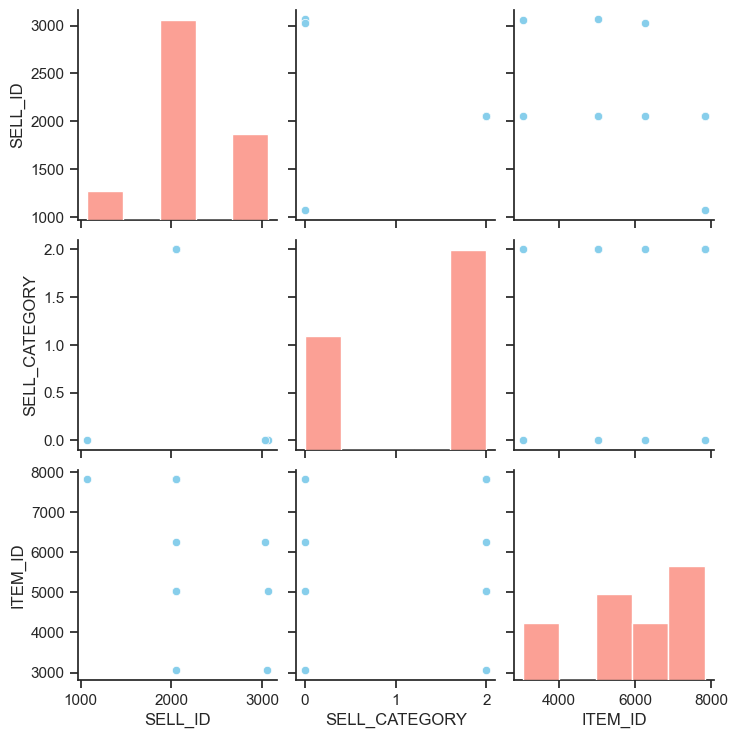

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Define the color for scatter plots
scatter_color = 'skyblue'
# Define the color for diagonal plots
diag_color = 'salmon'

# Creating a pairplot with different colors for scatter and diagonal plots
sns.pairplot(sold, plot_kws={'color': scatter_color}, diag_kws={'color': diag_color})

plt.show()


In [16]:
date_info.head()
date_info.info()

CALENDAR_DATE  YEAR   HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
0    01-01-2012  2012  New Year           1               0   
1    01-02-2012  2012  New Year           0               0   
2    01-03-2012  2012  New Year           0               0   
3    01-04-2012  2012       NaN           0               0   
4    01-05-2012  2012       NaN           0               0   

   AVERAGE_TEMPERATURE  IS_OUTDOOR    WEEKDAY  
0                 24.8           0     Sunday  
1                 24.8           0     Monday  
2                 32.0           1    Tuesday  
3                 32.0           1  Wednesday  
4                 24.8           0   Thursday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        1349 non-null   object 
 1   YEAR                 1349 non-null   int64  
 2   HOLIDAY              105 non-null    object 
 3   IS_WEEKEND           1349 non-null   int64  
 4   IS_SCHOOLBREAK       1349 non-null   int64  
 5   AVERAGE_TEMPERATURE  1349 non-null   float64
 6   IS_OUTDOOR           1349 non-null   int64  
 7   WEEKDAY              1349 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 84.4+ KB


In [17]:
date_info.columns

Index(['CALENDAR_DATE', 'YEAR', 'HOLIDAY', 'IS_WEEKEND', 'IS_SCHOOLBREAK',
       'AVERAGE_TEMPERATURE', 'IS_OUTDOOR', 'WEEKDAY'],
      dtype='object')

In [18]:
date_info.describe()
date_info.describe(include = ['O'])

YEAR   IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  \
count  1349.000000  1349.000000     1349.000000          1349.000000   
mean   2013.375093     0.285397        0.204596            56.326019   
std       1.073073     0.451771        0.403556            20.227597   
min    2012.000000     0.000000        0.000000            14.000000   
25%    2012.000000     0.000000        0.000000            35.600000   
50%    2013.000000     0.000000        0.000000            60.800000   
75%    2014.000000     1.000000        0.000000            75.200000   
max    2015.000000     1.000000        1.000000            87.800000   

        IS_OUTDOOR  
count  1349.000000  
mean      0.862120  
std       0.344902  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

CALENDAR_DATE         HOLIDAY WEEKDAY
count           1349             105    1349
unique          1348               8       7
top       03-01-2013  Luner New Year  Sunday
freq               2              28     193

In [19]:
date_info.isnull().sum()

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
WEEKDAY                   0
dtype: int64

In [20]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")
date_info.isnull().sum()

CALENDAR_DATE          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
WEEKDAY                0
dtype: int64

In [21]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [22]:
date_info['CALENDAR_DATE'].min()

'01-01-2012'

In [23]:
date_info['CALENDAR_DATE'].max()

'9-30-2014'

In [24]:
date_info.shape

(1349, 8)

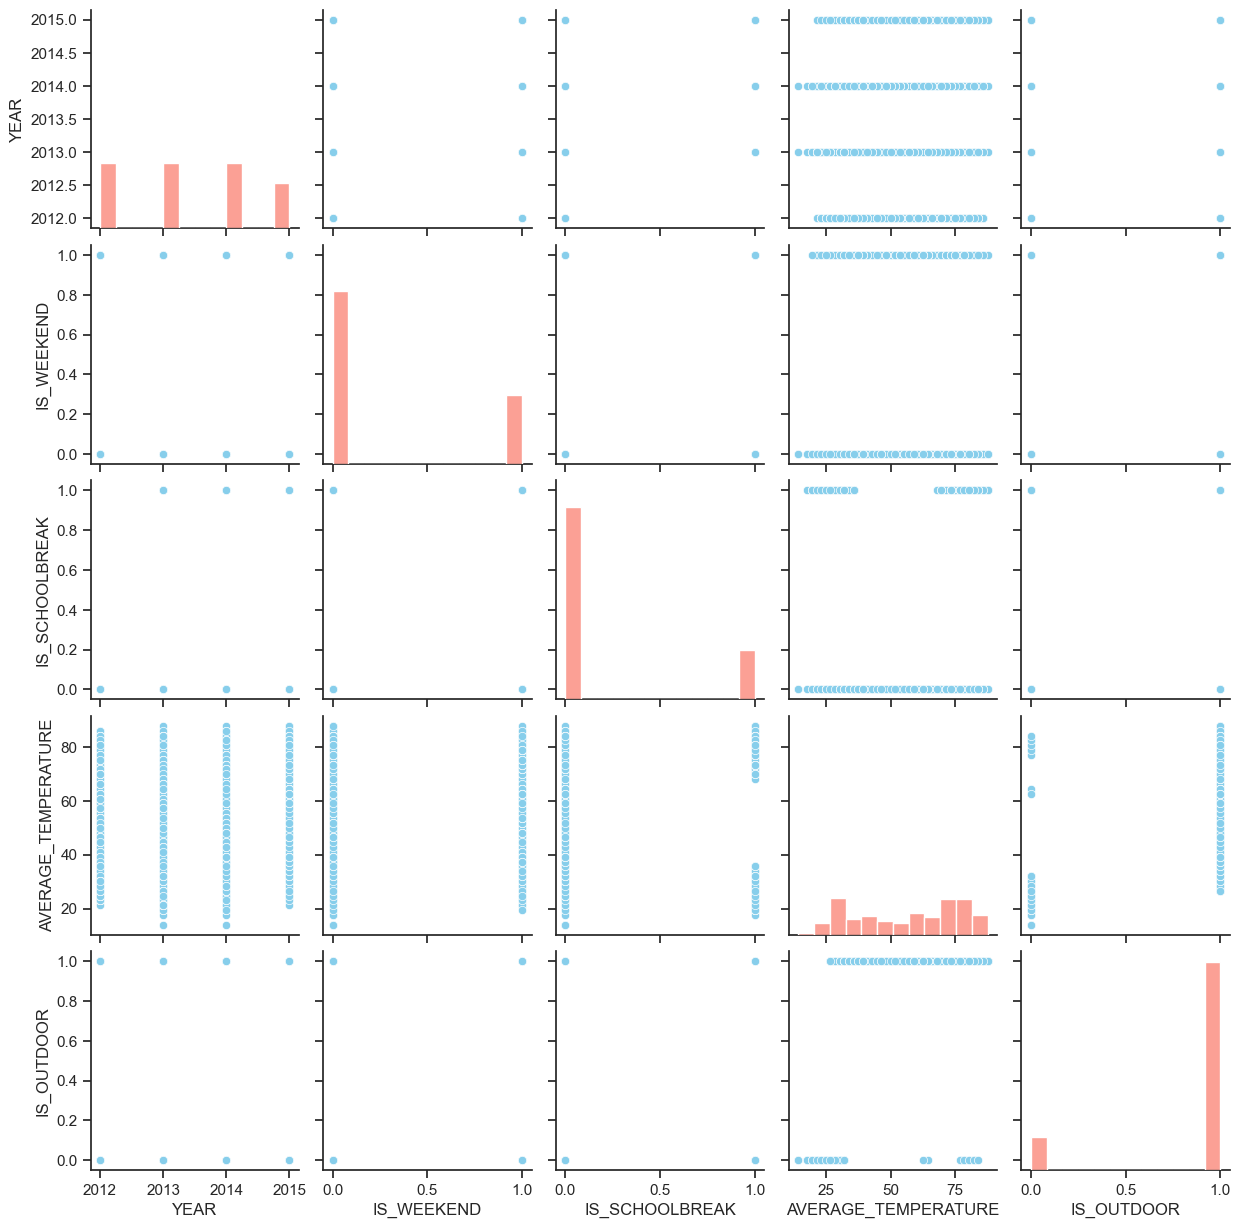

In [25]:
sns.pairplot(date_info,plot_kws={'color': 'skyblue'},diag_kws={'color': 'salmon'})

In [26]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

SELL_ID  BURGER  COFFEE  COKE  LEMONADE
0      1070       1       0     0         0
1      3055       0       1     0         0
2      3067       0       0     1         0
3      3028       0       0     0         1
4      2051       1       0     0         0
5      2051       0       0     1         0
6      2052       1       0     0         0
7      2052       0       0     0         1
8      2053       1       0     0         0
9      2053       0       0     1         0
10     2053       0       1     0         0

In [27]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

SELL_ID  BURGER  COFFEE  COKE  LEMONADE
SELL_ID                                         
1070        1070       1       0     0         0
2051        4102       1       0     1         0
2052        4104       1       0     0         1
2053        6159       1       1     1         0
3028        3028       0       0     0         1
3055        3055       0       1     0         0
3067        3067       0       0     1         0

In [28]:
sold.columns

Index(['SELL_ID', 'SELL_CATEGORY', 'ITEM_ID', 'ITEM_NAME'], dtype='object')

In [29]:
transactions.columns

Index(['CALENDAR_DATE', 'PRICE', 'QUANTITY', 'SELL_ID', 'SELL_CATEGORY'], dtype='object')

In [30]:
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(10)
data1.shape

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
0     1070              0    BURGER    01-01-2012   15.5        46
1     1070              0    BURGER    01-03-2012   15.5        62
2     1070              0    BURGER    01-04-2012   15.5        88
3     1070              0    BURGER    01-05-2012   15.5       104
4     1070              0    BURGER    01-06-2012   15.5       100
5     1070              0    BURGER    01-07-2012   15.5        70
6     1070              0    BURGER    01-09-2012   15.5       106
7     1070              0    BURGER    01-10-2012   15.5       108
8     1070              0    BURGER    01-11-2012   15.5       104
9     1070              0    BURGER    01-12-2012   15.5       102

(10788, 6)

In [31]:
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()
b.shape
b

(10778,)

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01-01-2012     15.5      46
                                   01-01-2014     15.5      72
                                   01-01-2015     14.0      66
                                   01-02-2013     15.5      68
                                   01-02-2014     15.5      76
                                                          ... 
3067     0              COKE       9-13-12        15.0      86
                                   9-19-14        15.5      62
                                   9-22-12        15.0      62
                                   9-25-12        15.0      90
                                   9-26-13        14.0     100
Name: QUANTITY, Length: 10778, dtype: int64

In [32]:
data1.shape

(10788, 6)

In [33]:
intermediate_data = b.reset_index()
intermediate_data.head(10)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
0     1070              0    BURGER    01-01-2012   15.5        46
1     1070              0    BURGER    01-01-2014   15.5        72
2     1070              0    BURGER    01-01-2015   14.0        66
3     1070              0    BURGER    01-02-2013   15.5        68
4     1070              0    BURGER    01-02-2014   15.5        76
5     1070              0    BURGER    01-02-2015   14.0       102
6     1070              0    BURGER    01-03-2012   15.5        62
7     1070              0    BURGER    01-03-2013   15.5        70
8     1070              0    BURGER    01-03-2014   15.5        68
9     1070              0    BURGER    01-03-2015   14.0        68

In [34]:
intermediate_data['CALENDAR_DATE'].min()

'01-01-2012'

In [35]:
intermediate_data['CALENDAR_DATE'].max()

'9-30-14'

In [36]:
combined_data = pd.merge( intermediate_data,  date_info , on = 'CALENDAR_DATE')
combined_data.head(10)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER    01-01-2012  15.50        46  2012   
1     2051              2    BURGER    01-01-2012  12.73        22  2012   
2     2051              2      COKE    01-01-2012  12.73        22  2012   
3     2052              2    BURGER    01-01-2012  12.75        18  2012   
4     2052              2  LEMONADE    01-01-2012  12.75        18  2012   
5     2053              2    BURGER    01-01-2012  12.60        30  2012   
6     2053              2    COFFEE    01-01-2012  12.60        30  2012   
7     2053              2      COKE    01-01-2012  12.60        30  2012   
8     1070              0    BURGER    01-01-2014  15.50        72  2014   
9     2051              2    BURGER    01-01-2014  13.27        22  2014   

    HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
0  New Year           1               0                 24.8           0   
1  New Year           1               0                 24.8           0   
2  New Year           1               0                 24.8           0   
3  New Year           1               0                 24.8           0   
4  New Year           1               0                 24.8           0   
5  New Year           1               0                 24.8           0   
6  New Year           1               0                 24.8           0   
7  New Year           1               0                 24.8           0   
8  New Year           0               0                 19.4           0   
9  New Year           0               0                 19.4           0   

     WEEKDAY  
0     Sunday  
1     Sunday  
2     Sunday  
3     Sunday  
4     Sunday  
5     Sunday  
6     Sunday  
7     Sunday  
8  Wednesday  
9  Wednesday

In [37]:
combined_data.shape

(4322, 13)

In [38]:
combined_data[combined_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_NAME, CALENDAR_DATE, PRICE, QUANTITY, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR, WEEKDAY]
Index: []

In [39]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

<BarContainer object of 7 artists>

Text(0.5, 0, 'WEEKDAY')

Text(0, 0.5, 'Total Quantity Sold')

Text(0, 0.5, 'Total Revenue')

Text(0.5, 1.0, 'Sales Analysis by Weekday')

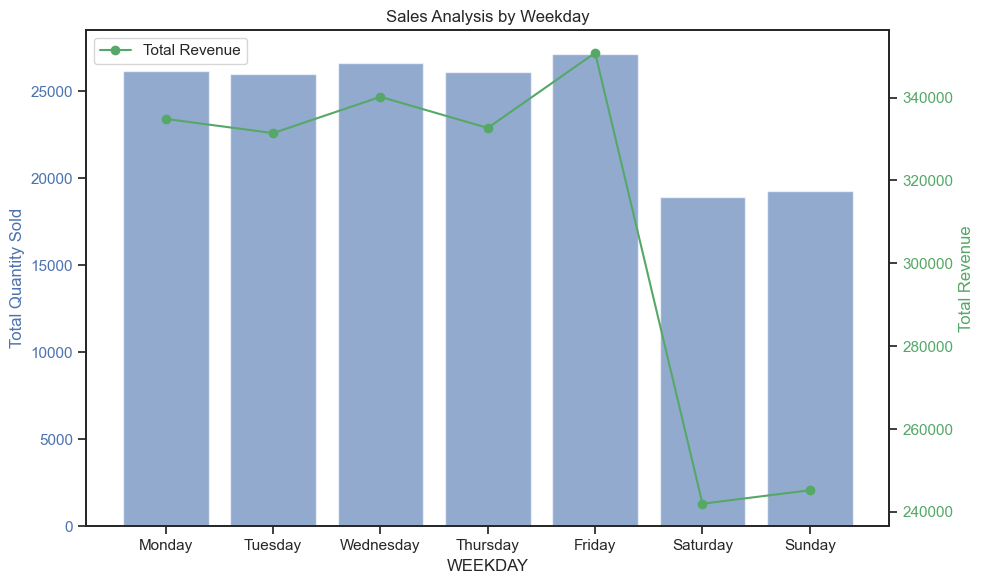

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
combined_data['CALENDAR_DATE'] = pd.to_datetime(combined_data['CALENDAR_DATE'])
combined_data['WEEKDAY'] = combined_data['CALENDAR_DATE'].dt.day_name()

# Calculating Revenue (price * quantity)
combined_data['revenue'] = combined_data['PRICE'] * combined_data['QUANTITY']

# Grouping data by 'weekday' to find total quantity and total revenue
weekday_sales = combined_data.groupby('WEEKDAY').agg(total_quantity=('QUANTITY', 'sum'),
                                          total_revenue=('revenue', 'sum')).reset_index()
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['WEEKDAY'] = pd.Categorical(weekday_sales['WEEKDAY'], categories=sorter, ordered=True)
weekday_sales = weekday_sales.sort_values('WEEKDAY')
fig, ax1 = plt.subplots(figsize=(10, 6))
# Plotting Quantity Sold
ax1.bar(weekday_sales['WEEKDAY'], weekday_sales['total_quantity'], color='b', alpha=0.6, label='Quantity Sold')
ax1.set_xlabel('WEEKDAY')
ax1.set_ylabel('Total Quantity Sold', color='b')
ax1.tick_params(axis='y', labelcolor='b')
# Creating a twin axis for revenue
ax2 = ax1.twinx()
ax2.plot(weekday_sales['WEEKDAY'], weekday_sales['total_revenue'], color='g', marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='g')
ax2.tick_params(axis='y', labelcolor='g')
plt.title('Sales Analysis by Weekday')
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()

<Figure size 1500x1000 with 0 Axes>

<Axes: xlabel='WEEKDAY', ylabel='ITEM_NAME'>

Text(0.5, 1.0, 'Average Sales Quantity of Items by Weekday')

Text(0.5, 77.24999999999999, 'Weekday')

Text(154.75, 0.5, 'Item Name')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Monday'),
  Text(1.5, 0, 'Tuesday'),
  Text(2.5, 0, 'Wednesday'),
  Text(3.5, 0, 'Thursday'),
  Text(4.5, 0, 'Friday'),
  Text(5.5, 0, 'Saturday'),
  Text(6.5, 0, 'Sunday')])

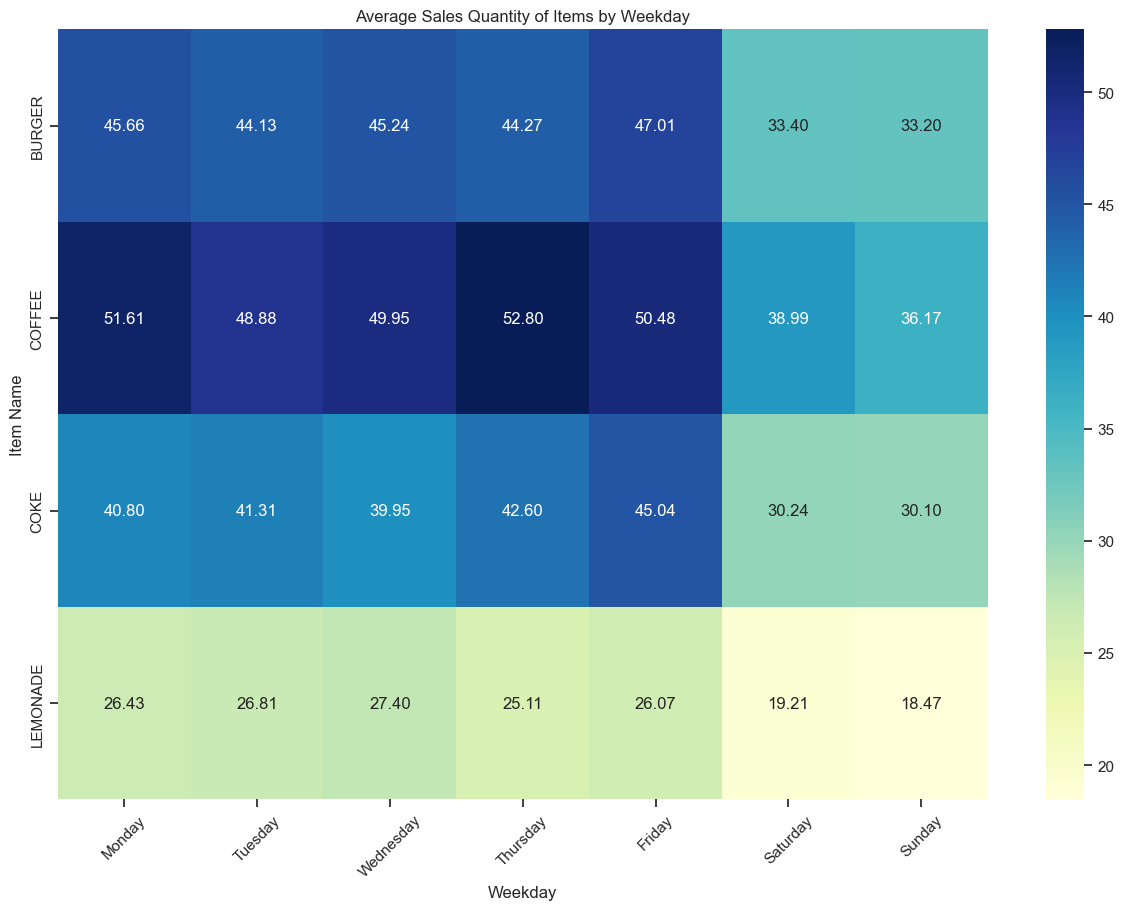

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
combined_data['CALENDAR_DATE'] = pd.to_datetime(combined_data['CALENDAR_DATE'])
combined_data['WEEKDAY'] = combined_data['CALENDAR_DATE'].dt.day_name()

# Grouping data by item and weekday to find average sales quantity
average_sales = combined_data.groupby(['ITEM_NAME', 'WEEKDAY']).agg(average_quantity=('QUANTITY', 'mean')).reset_index()
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_sales['WEEKDAY'] = pd.Categorical(average_sales['WEEKDAY'], categories=sorter, ordered=True)
average_sales = average_sales.sort_values(['ITEM_NAME', 'WEEKDAY'])
pivot_df = average_sales.pivot('ITEM_NAME', 'WEEKDAY', 'average_quantity')
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Sales Quantity of Items by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Item Name')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: xlabel='CALENDAR_DATE', ylabel='daily_revenue'>

Text(0.5, 1.0, 'Daily Sales Revenue')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Revenue')

<Axes: >

<Axes: xlabel='WEEKDAY', ylabel='weekly_revenue'>

Text(0.5, 1.0, 'Weekly Sales Revenue')

Text(0.5, 0, 'WEEKDAY')

Text(0, 0.5, 'Revenue')

<Axes: >

<Axes: xlabel='CALENDAR_DATE', ylabel='monthly_revenue'>

Text(0.5, 1.0, 'Monthly Sales Revenue')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Revenue')

<Axes: >

<Axes: xlabel='CALENDAR_DATE', ylabel='yearly_revenue'>

Text(0.5, 1.0, 'Yearly Sales Revenue')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Revenue')

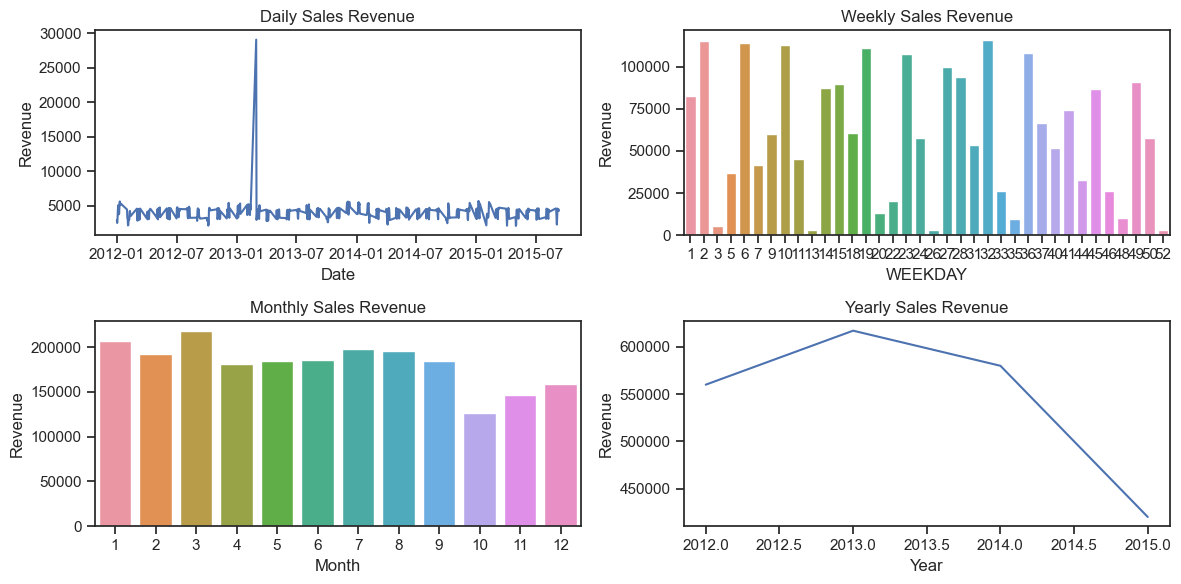

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
combined_data['CALENDAR_DATE'] = pd.to_datetime(combined_data['CALENDAR_DATE'])
# Calculating Revenue (price * quantity)
combined_data['revenue'] = combined_data['PRICE'] * combined_data['QUANTITY']
# Daily Sales Analysis
daily_sales = combined_data.groupby(combined_data['CALENDAR_DATE'].dt.date).agg(daily_revenue=('revenue', 'sum')).reset_index()
daily_sales['CALENDAR_DATE'] = pd.to_datetime(daily_sales['CALENDAR_DATE'])
# Weekly Sales Analysis
combined_data['WEEKDAY'] = combined_data['CALENDAR_DATE'].dt.isocalendar().week
weekly_sales = combined_data.groupby(combined_data['WEEKDAY']).agg(weekly_revenue=('revenue', 'sum')).reset_index()
# Monthly Sales Analysis
monthly_sales = combined_data.groupby(combined_data['CALENDAR_DATE'].dt.month).agg(monthly_revenue=('revenue', 'sum')).reset_index()
# Yearly Sales Analysis
yearly_sales = combined_data.groupby(combined_data['CALENDAR_DATE'].dt.year).agg(yearly_revenue=('revenue', 'sum')).reset_index()
plt.figure(figsize=(12, 6))
# Daily Sales Plot
plt.subplot(2, 2, 1)
sns.lineplot(data=daily_sales, x='CALENDAR_DATE', y='daily_revenue')
plt.title('Daily Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
# Weekly Sales Plot
plt.subplot(2, 2, 2)
sns.barplot(data=weekly_sales, x='WEEKDAY', y='weekly_revenue')
plt.title('Weekly Sales Revenue')
plt.xlabel('WEEKDAY')
plt.ylabel('Revenue')
# Monthly Sales Plot
plt.subplot(2, 2, 3)
sns.barplot(data=monthly_sales, x='CALENDAR_DATE', y='monthly_revenue')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
# Yearly Sales Plot
plt.subplot(2, 2, 4)
sns.lineplot(data=yearly_sales, x='CALENDAR_DATE', y='yearly_revenue')
plt.title('Yearly Sales Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: xlabel='HOLIDAY'>

Text(0.5, 1.0, 'Average Daily Sales During Holidays')

Text(0.5, 0, 'HOLIDAY')

Text(0, 0.5, 'Average Daily Sales')

<Axes: >

<Axes: xlabel='IS_SCHOOLBREAK'>

Text(0.5, 1.0, 'Average Daily Sales During School Breaks')

Text(0.5, 0, 'IS_SCHOOLBREAK')

Text(0, 0.5, 'Average Daily Sales')

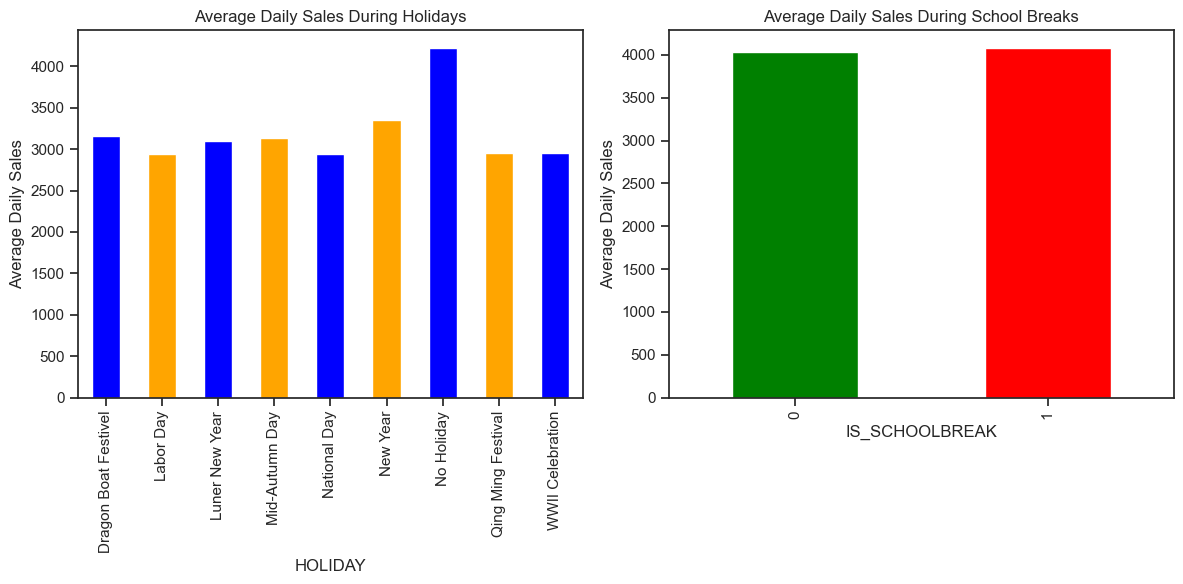

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
combined_data['CALENDAR_DATE'] = pd.to_datetime(combined_data['CALENDAR_DATE'])
# Calculating total sales
combined_data['total_sales'] = combined_data['PRICE'] * combined_data['QUANTITY']

# Grouping by date and calculating daily total sales
daily_sales = combined_data.groupby('CALENDAR_DATE').total_sales.sum().reset_index()

# Merging with the holiday and school break information
daily_sales = daily_sales.merge(combined_data[['CALENDAR_DATE', 'HOLIDAY', 'IS_SCHOOLBREAK']].drop_duplicates(),
                                on='CALENDAR_DATE')

# Calculating average sales for different categories
average_sales_holiday = daily_sales.groupby('HOLIDAY').total_sales.mean()
average_sales_schoolbreak = daily_sales.groupby('IS_SCHOOLBREAK').total_sales.mean()
plt.figure(figsize=(12, 6))
colors_holiday = ['blue', 'orange']
colors_schoolbreak = ['green', 'red']

# Average sales during holidays
plt.subplot(1, 2, 1)
average_sales_holiday.plot(kind='bar', color=colors_holiday)
plt.title('Average Daily Sales During Holidays')
plt.xlabel('HOLIDAY')
plt.ylabel('Average Daily Sales')

# Average sales during school breaks
plt.subplot(1, 2, 2)
average_sales_schoolbreak.plot(kind='bar', color=colors_schoolbreak)
plt.title('Average Daily Sales During School Breaks')
plt.xlabel('IS_SCHOOLBREAK')
plt.ylabel('Average Daily Sales')

plt.tight_layout()
plt.show()



In [44]:
import pandas as pd
import plotly.graph_objs as go
combined_data['CALENDAR_DATE'] = pd.to_datetime(combined_data['CALENDAR_DATE'])
combined_data['MONTH'] = combined_data['CALENDAR_DATE'].dt.month
combined_data['YEAR'] = combined_data['CALENDAR_DATE'].dt.year
combined_data['TOTAL_SALES'] = combined_data['PRICE'] * combined_data['QUANTITY']
# Grouping by year and month
monthly_sales = combined_data.groupby(['YEAR', 'MONTH'])['TOTAL_SALES'].sum().reset_index()
# Creating traces for each year
traces = []
for year in monthly_sales['YEAR'].unique():
    filtered_data = monthly_sales[monthly_sales['YEAR'] == year]
    traces.append(go.Scatter(
        x=filtered_data['MONTH'],
        y=filtered_data['TOTAL_SALES'],
        mode='lines+markers',
        name=str(year)
    ))
layout = go.Layout(
    title='Monthly Sales Data by Year',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Sales'),
    hovermode='closest'
)
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [45]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]
bau_data.shape
bau_data.head(10)

(2061, 17)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
40     1070              0    BURGER    2015-01-02  14.00       102  2015   
41     2051              2    BURGER    2015-01-02  11.53        30  2015   
42     2051              2      COKE    2015-01-02  11.53        30  2015   
43     2052              2    BURGER    2015-01-02  11.45        22  2015   
44     2052              2  LEMONADE    2015-01-02  11.45        22  2015   
45     2053              2    BURGER    2015-01-02  10.81        60  2015   
46     2053              2    COFFEE    2015-01-02  10.81        60  2015   
47     2053              2      COKE    2015-01-02  10.81        60  2015   
80     1070              0    BURGER    2012-01-04  15.50        88  2012   
81     2051              2    BURGER    2012-01-04  12.73        26  2012   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
40  No Holiday           0               0                 37.4           1   
41  No Holiday           0               0                 37.4           1   
42  No Holiday           0               0                 37.4           1   
43  No Holiday           0               0                 37.4           1   
44  No Holiday           0               0                 37.4           1   
45  No Holiday           0               0                 37.4           1   
46  No Holiday           0               0                 37.4           1   
47  No Holiday           0               0                 37.4           1   
80  No Holiday           0               0                 32.0           1   
81  No Holiday           0               0                 32.0           1   

    WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
40        1  1428.00      1428.00      1      1428.00  
41        1   345.90       345.90      1       345.90  
42        1   345.90       345.90      1       345.90  
43        1   251.90       251.90      1       251.90  
44        1   251.90       251.90      1       251.90  
45        1   648.60       648.60      1       648.60  
46        1   648.60       648.60      1       648.60  
47        1   648.60       648.60      1       648.60  
80        1  1364.00      1364.00      1      1364.00  
81        1   330.98       330.98      1       330.98

In [46]:
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

In [47]:
import pandas as pd
import plotly.graph_objs as go
bau_data['CALENDAR_DATE'] = pd.to_datetime(bau_data['CALENDAR_DATE'])
bau_data['MONTH'] = bau_data['CALENDAR_DATE'].dt.month
bau_data['YEAR'] = bau_data['CALENDAR_DATE'].dt.year

# Calculating total sales
bau_data['TOTAL_SALES'] = bau_data['PRICE'] * bau_data['QUANTITY']

# Grouping by year and month
monthly_sales = bau_data.groupby(['YEAR', 'MONTH'])['TOTAL_SALES'].sum().reset_index()

# Creating traces for each year
traces = []
for year in monthly_sales['YEAR'].unique():
    filtered_data = monthly_sales[monthly_sales['YEAR'] == year]
    traces.append(go.Scatter(
        x=filtered_data['MONTH'],
        y=filtered_data['TOTAL_SALES'],
        mode='lines+markers',
        name=str(year)
    ))
layout = go.Layout(
    title='Monthly Sales Data by Year',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Sales'),
    hovermode='closest'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


In [48]:
import plotly.graph_objs as go
import pandas as pd
item_counts = bau_data['ITEM_NAME'].value_counts()
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
colors *= (len(item_counts) // len(colors)) + 1

data = [go.Bar(x=item_counts.index, y=item_counts.values, marker=dict(color=colors))]
layout = go.Layout(
    title='Frequency of Items',
    xaxis=dict(title='Item Name'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [49]:
import plotly.graph_objs as go
data = go.Histogram(x=bau_data['PRICE'], marker=dict(color='skyblue', line=dict(color='black', width=1)))

layout = go.Layout(
    title='Histogram of Prices',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=[data], layout=layout)
fig.show()


In [50]:
#combined data
import plotly.graph_objs as go
trace = go.Scatter(
    x=combined_data['PRICE'],
    y=combined_data['QUANTITY'],
    mode='markers',
    marker=dict(color='skyblue', size=8)
)

layout = go.Layout(
    title='Scatter Plot of Price vs Quantity',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Quantity')
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [51]:
 #bau_data
import plotly.graph_objects as go
scatter_plot = go.Scatter(
    x=bau_data['PRICE'],
    y=bau_data['QUANTITY'],
    mode='markers',
    marker=dict(color='skyblue', size=8)
)

layout = go.Layout(
    title='Scatter Plot of Price vs Quantity',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Quantity')
)

fig = go.Figure(data=[scatter_plot], layout=layout)
fig.show()


In [52]:
#combined data
import plotly.express as px
fig = px.scatter(combined_data, x='PRICE', y='QUANTITY', color='ITEM_NAME', opacity=0.5,
                 facet_col='ITEM_NAME', facet_col_wrap=2,
                 labels={'PRICE': 'Price', 'QUANTITY': 'Quantity'}, title='Price vs Quantity by Item Name')
fig.show()


In [53]:
#bau_data
import plotly.express as px
fig = px.scatter(bau_data, x='PRICE', y='QUANTITY', color='ITEM_NAME', opacity=0.5,
                 facet_col='ITEM_NAME', facet_col_wrap=2,
                 labels={'PRICE': 'Price', 'QUANTITY': 'Quantity'}, title='Price vs Quantity by Item Name')
fig.show()


In [54]:
#Burger
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
import plotly.graph_objects as go
scatter_plot = go.Scatter(
    x=burger['PRICE'],
    y=burger['QUANTITY'],
    mode='markers',
    marker=dict(color='blue', size=8)
)

layout = go.Layout(
    title='Scatter Plot of Price vs Quantity for Burgers',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Quantity')
)

fig = go.Figure(data=[scatter_plot], layout=layout)
fig.show()


SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER    2012-01-01  15.50        46  2012   
1     2051              2    BURGER    2012-01-01  12.73        22  2012   
3     2052              2    BURGER    2012-01-01  12.75        18  2012   
5     2053              2    BURGER    2012-01-01  12.60        30  2012   
8     1070              0    BURGER    2014-01-01  15.50        72  2014   

    HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
0  New Year           1               0                 24.8           0   
1  New Year           1               0                 24.8           0   
3  New Year           1               0                 24.8           0   
5  New Year           1               0                 24.8           0   
8  New Year           0               0                 19.4           0   

   WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
0       52   713.00       713.00      1       713.00  
1       52   280.06       280.06      1       280.06  
3       52   229.50       229.50      1       229.50  
5       52   378.00       378.00      1       378.00  
8        1  1116.00      1116.00      1      1116.00

(2060, 17)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  2060.000000    2060.000000  2060.000000  2060.000000  2060.000000   
mean   1841.775243       1.571845    12.764403    41.852427  2013.387379   
std     402.895903       0.820561     1.507394    24.348561     1.077130   
min    1070.000000       0.000000    10.120000     8.000000  2012.000000   
25%    2051.000000       2.000000    11.530000    24.000000  2012.000000   
50%    2052.000000       2.000000    12.600000    34.000000  2013.000000   
75%    2053.000000       2.000000    13.270000    54.000000  2014.000000   
max    2053.000000       2.000000    16.500000   178.000000  2015.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  \
count  2060.000000     2060.000000          2060.000000  2060.000000   
mean      0.284951        0.198058            55.812427     0.840291   
std       0.451501        0.398633            20.378033     0.366425   
min       0.000000        0.000000            14.000000     0.000000   
25%       0.000000        0.000000            35.600000     1.000000   
50%       0.000000        0.000000            60.800000     1.000000   
75%       1.000000        0.000000            75.200000     1.000000   
max       1.000000        1.000000            86.000000     1.000000   

         WEEKDAY      revenue  total_sales        MONTH  TOTAL_SALES  
count     2060.0  2060.000000  2060.000000  2060.000000  2060.000000  
mean   23.962136   556.387010   556.387010     6.163107   556.387010  
std    14.570007   384.894967   384.894967     3.347539   384.894967  
min          1.0    98.080000    98.080000     1.000000    98.080000  
25%         10.0   280.060000   280.060000     3.000000   280.060000  
50%         23.0   413.640000   413.640000     6.000000   413.640000  
75%         36.0   643.240000   643.240000     9.000000   643.240000  
max         52.0  2759.000000  2759.000000    12.000000  2759.000000

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

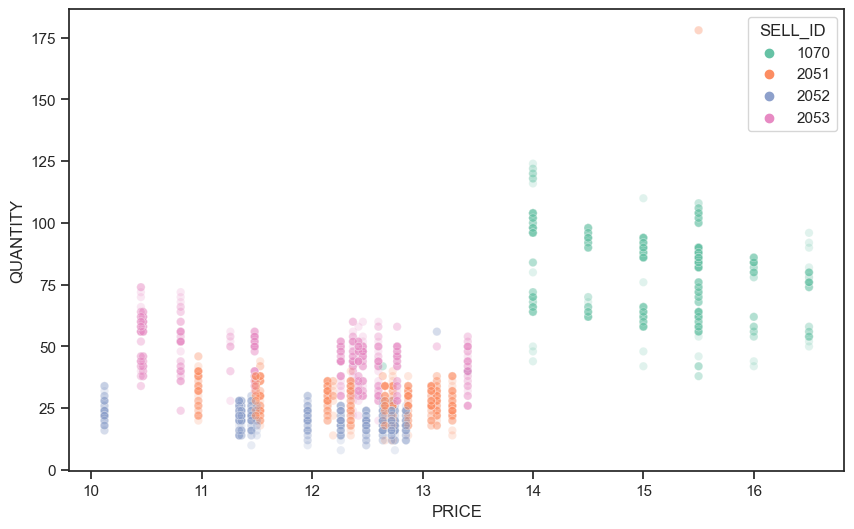

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=burger, x='PRICE', y='QUANTITY', hue='SELL_ID', 
                palette='Set2', 
                legend=True, alpha=0.2)
plt.show()


In [56]:
np.unique(combined_data.SELL_ID)
np.unique(combined_data.SELL_CATEGORY)

array([1070, 2051, 2052, 2053, 3028, 3055, 3067], dtype=int64)

array([0, 2], dtype=int64)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0      1070              0    BURGER    2012-01-01   15.5        46  2012   
8      1070              0    BURGER    2014-01-01   15.5        72  2014   
16     1070              0    BURGER    2015-01-01   14.0        66  2015   
24     1070              0    BURGER    2013-01-02   15.5        68  2013   
32     1070              0    BURGER    2014-01-02   15.5        76  2014   

     HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
0   New Year           1               0                 24.8           0   
8   New Year           0               0                 19.4           0   
16  New Year           0               0                 37.4           1   
24  New Year           0               0                 28.4           0   
32  New Year           0               0                 14.0           0   

    WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
0        52    713.0        713.0      1        713.0  
8         1   1116.0       1116.0      1       1116.0  
16        1    924.0        924.0      1        924.0  
24        1   1054.0       1054.0      1       1054.0  
32        1   1178.0       1178.0      1       1178.0

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    441.0          441.0  441.000000  441.000000   441.000000   
mean    1070.0            0.0   15.162766   79.365079  2013.358277   
std        0.0            0.0    0.752580   17.032470     1.075969   
min     1070.0            0.0   12.640000   38.000000  2012.000000   
25%     1070.0            0.0   14.500000   64.000000  2012.000000   
50%     1070.0            0.0   15.500000   82.000000  2013.000000   
75%     1070.0            0.0   15.500000   90.000000  2014.000000   
max     1070.0            0.0   16.500000  124.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR    WEEKDAY  \
count  441.000000      441.000000           441.000000  441.000000      441.0   
mean     0.292517        0.190476            55.648980    0.841270  23.684807   
std      0.455435        0.393123            20.230183    0.365839  14.545945   
min      0.000000        0.000000            14.000000    0.000000        1.0   
25%      0.000000        0.000000            35.600000    1.000000       10.0   
50%      0.000000        0.000000            60.800000    1.000000       23.0   
75%      1.000000        0.000000            73.400000    1.000000       36.0   
max      1.000000        1.000000            86.000000    1.000000       52.0   

           revenue  total_sales       MONTH  TOTAL_SALES  
count   441.000000   441.000000  441.000000   441.000000  
mean   1200.203537  1200.203537    6.097506  1200.203537  
std     246.507030   246.507030    3.338756   246.507030  
min     530.880000   530.880000    1.000000   530.880000  
25%     960.000000   960.000000    3.000000   960.000000  
50%    1290.000000  1290.000000    6.000000  1290.000000  
75%    1364.000000  1364.000000    9.000000  1364.000000  
max    1736.000000  1736.000000   12.000000  1736.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

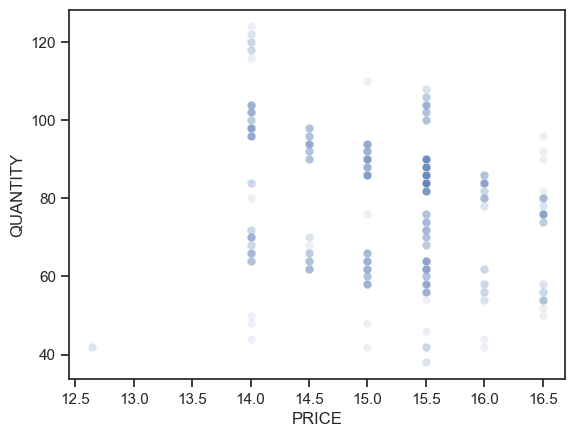

In [57]:
# The correlation for the sell of burger only ( Sell_id = 1070)
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     29.14
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.11e-07
Time:                        23:14:32   Log-Likelihood:                -1861.4
No. Observations:                 441   AIC:                             3727.
Df Residuals:                     439   BIC:                             3735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.9771     15.880     10.389      0.0

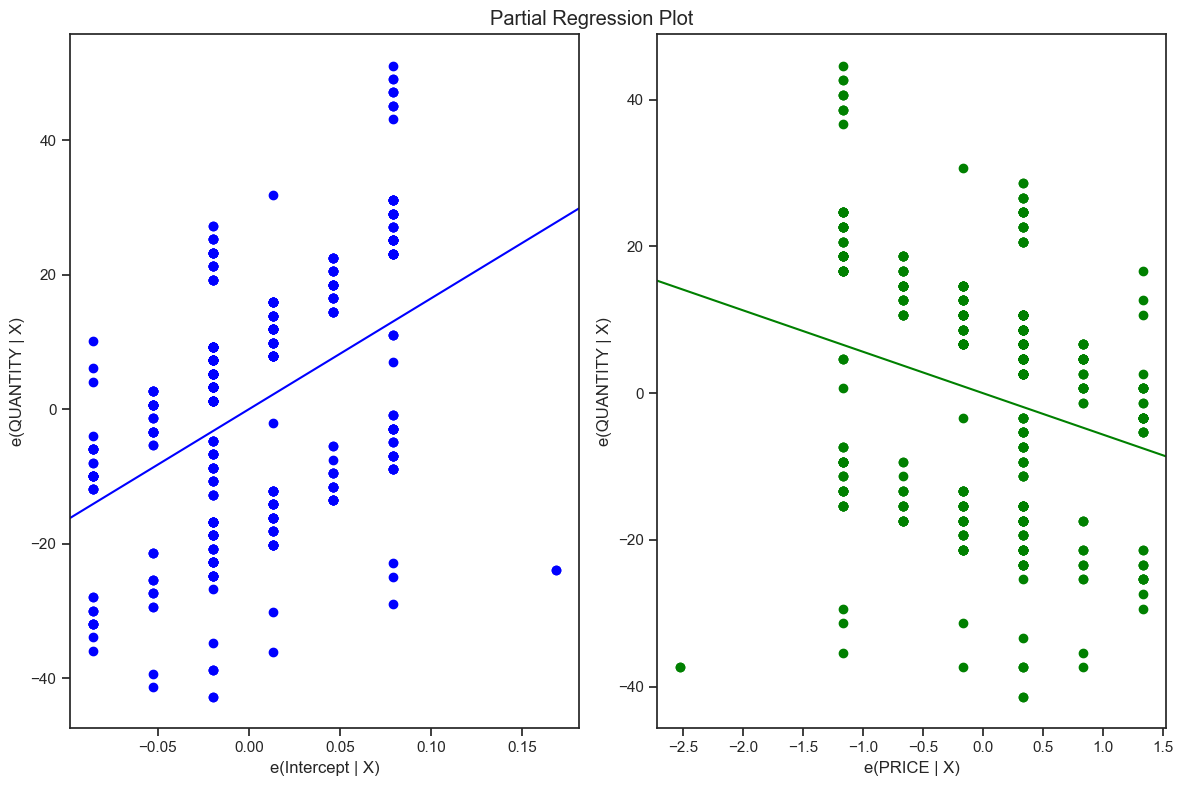

In [58]:
# Modling
# This is for the combined data
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)
colors = ['blue', 'green', 'red', 'purple'] 
for i, ax in enumerate(fig.axes):
    color = colors[i % len(colors)]  
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)
plt.show()


SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
40     1070              0    BURGER    2015-01-02  14.00       102  2015   
41     2051              2    BURGER    2015-01-02  11.53        30  2015   
43     2052              2    BURGER    2015-01-02  11.45        22  2015   
45     2053              2    BURGER    2015-01-02  10.81        60  2015   
80     1070              0    BURGER    2012-01-04  15.50        88  2012   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
40  No Holiday           0               0                 37.4           1   
41  No Holiday           0               0                 37.4           1   
43  No Holiday           0               0                 37.4           1   
45  No Holiday           0               0                 37.4           1   
80  No Holiday           0               0                 32.0           1   

    WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
40        1   1428.0       1428.0      1       1428.0  
41        1    345.9        345.9      1        345.9  
43        1    251.9        251.9      1        251.9  
45        1    648.6        648.6      1        648.6  
80        1   1364.0       1364.0      1       1364.0

(983, 17)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count   983.000000     983.000000  983.000000  983.000000   983.000000   
mean   1841.213632       1.570702   12.720743   47.869786  2013.271617   
std     403.393587       0.821575    1.522806   26.756641     1.068184   
min    1070.000000       0.000000   10.120000   16.000000  2012.000000   
25%    2051.000000       2.000000   11.490000   26.000000  2012.000000   
50%    2052.000000       2.000000   12.640000   38.000000  2013.000000   
75%    2053.000000       2.000000   13.270000   60.000000  2014.000000   
max    2053.000000       2.000000   16.500000  178.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR    WEEKDAY  \
count       983.0           983.0           983.000000  983.000000      983.0   
mean          0.0             0.0            53.546897    0.873856  25.028484   
std           0.0             0.0            18.787121    0.332181  15.414279   
min           0.0             0.0            21.200000    0.000000        1.0   
25%           0.0             0.0            37.400000    1.000000       11.0   
50%           0.0             0.0            51.800000    1.000000       23.0   
75%           0.0             0.0            71.600000    1.000000       37.0   
max           0.0             0.0            86.000000    1.000000       50.0   

           revenue  total_sales       MONTH  TOTAL_SALES  
count   983.000000   983.000000  983.000000   983.000000  
mean    634.441872   634.441872    6.387589   634.441872  
std     425.807122   425.807122    3.541912   425.807122  
min     199.840000   199.840000    1.000000   199.840000  
25%     322.220000   322.220000    3.000000   322.220000  
50%     460.740000   460.740000    6.000000   460.740000  
75%     668.390000   668.390000    9.000000   668.390000  
max    2759.000000  2759.000000   12.000000  2759.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

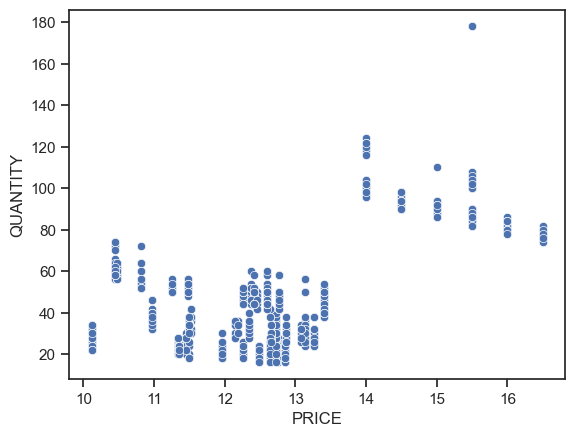

In [59]:
# This is for the normal condition i.e.when No holiday, no lunchbreak and no weekend.
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

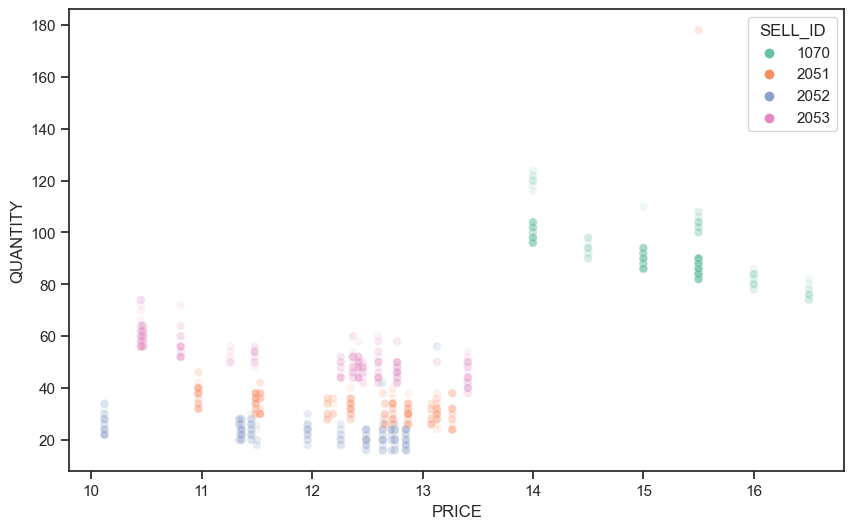

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=burger, x='PRICE', y='QUANTITY', hue='SELL_ID', 
                palette='Set2',
                legend=True, alpha=0.1)
plt.show()

In [61]:
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053, 3028, 3055, 3067], dtype=int64)

In [62]:
np.unique(bau_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
40      1070              0    BURGER    2015-01-02   14.0       102  2015   
80      1070              0    BURGER    2012-01-04   15.5        88  2012   
96      1070              0    BURGER    2012-01-05   15.5       104  2012   
119     1070              0    BURGER    2015-01-05   14.0       104  2015   
127     1070              0    BURGER    2012-01-06   15.5       100  2012   

        HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
40   No Holiday           0               0                 37.4           1   
80   No Holiday           0               0                 32.0           1   
96   No Holiday           0               0                 24.8           0   
119  No Holiday           0               0                 33.8           1   
127  No Holiday           0               0                 23.0           0   

     WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
40         1   1428.0       1428.0      1       1428.0  
80         1   1364.0       1364.0      1       1364.0  
96         1   1612.0       1612.0      1       1612.0  
119        2   1456.0       1456.0      1       1456.0  
127        1   1550.0       1550.0      1       1550.0

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    211.0          211.0  211.000000  211.000000   211.000000   
mean    1070.0            0.0   15.086635   91.194313  2013.260664   
std        0.0            0.0    0.740191   10.696469     1.079381   
min     1070.0            0.0   12.640000   42.000000  2012.000000   
25%     1070.0            0.0   14.500000   86.000000  2012.000000   
50%     1070.0            0.0   15.500000   90.000000  2013.000000   
75%     1070.0            0.0   15.500000   98.000000  2014.000000   
max     1070.0            0.0   16.500000  124.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR    WEEKDAY  \
count       211.0           211.0           211.000000  211.000000      211.0   
mean          0.0             0.0            53.403791    0.876777  24.772512   
std           0.0             0.0            18.635286    0.329474  15.479184   
min           0.0             0.0            21.200000    0.000000        1.0   
25%           0.0             0.0            37.400000    1.000000       11.0   
50%           0.0             0.0            51.800000    1.000000       23.0   
75%           0.0             0.0            71.600000    1.000000       37.0   
max           0.0             0.0            86.000000    1.000000       50.0   

           revenue  total_sales       MONTH  TOTAL_SALES  
count   211.000000   211.000000  211.000000   211.000000  
mean   1372.245308  1372.245308    6.327014  1372.245308  
std     135.260789   135.260789    3.555302   135.260789  
min     530.880000   530.880000    1.000000   530.880000  
25%    1302.000000  1302.000000    3.000000  1302.000000  
50%    1350.000000  1350.000000    6.000000  1350.000000  
75%    1400.000000  1400.000000    9.000000  1400.000000  
max    1736.000000  1736.000000   12.000000  1736.000000

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Scatter Plot of Price vs Quantity for Burger 1070')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Quantity')

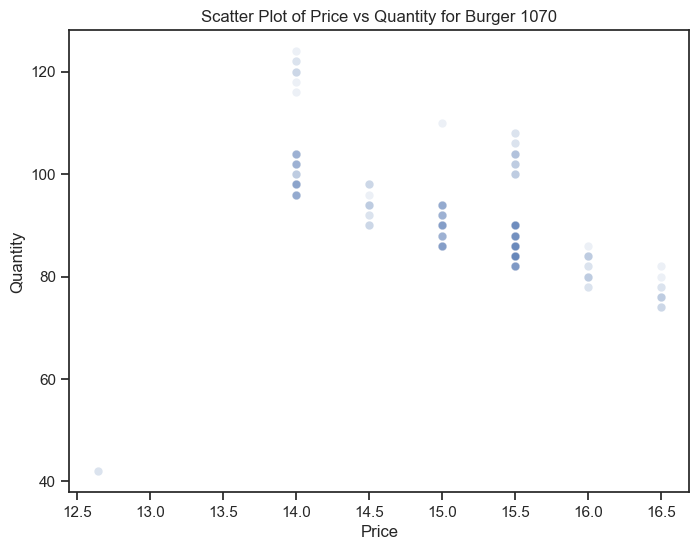

In [63]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(data=burger_1070, x='PRICE', y='QUANTITY', alpha=0.1)
plt.title('Scatter Plot of Price vs Quantity for Burger 1070')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     53.98
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.48e-12
Time:                        23:14:33   Log-Likelihood:                -774.71
No. Observations:                 211   AIC:                             1553.
Df Residuals:                     209   BIC:                             1560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    189.9670     13.460     14.113      0.0

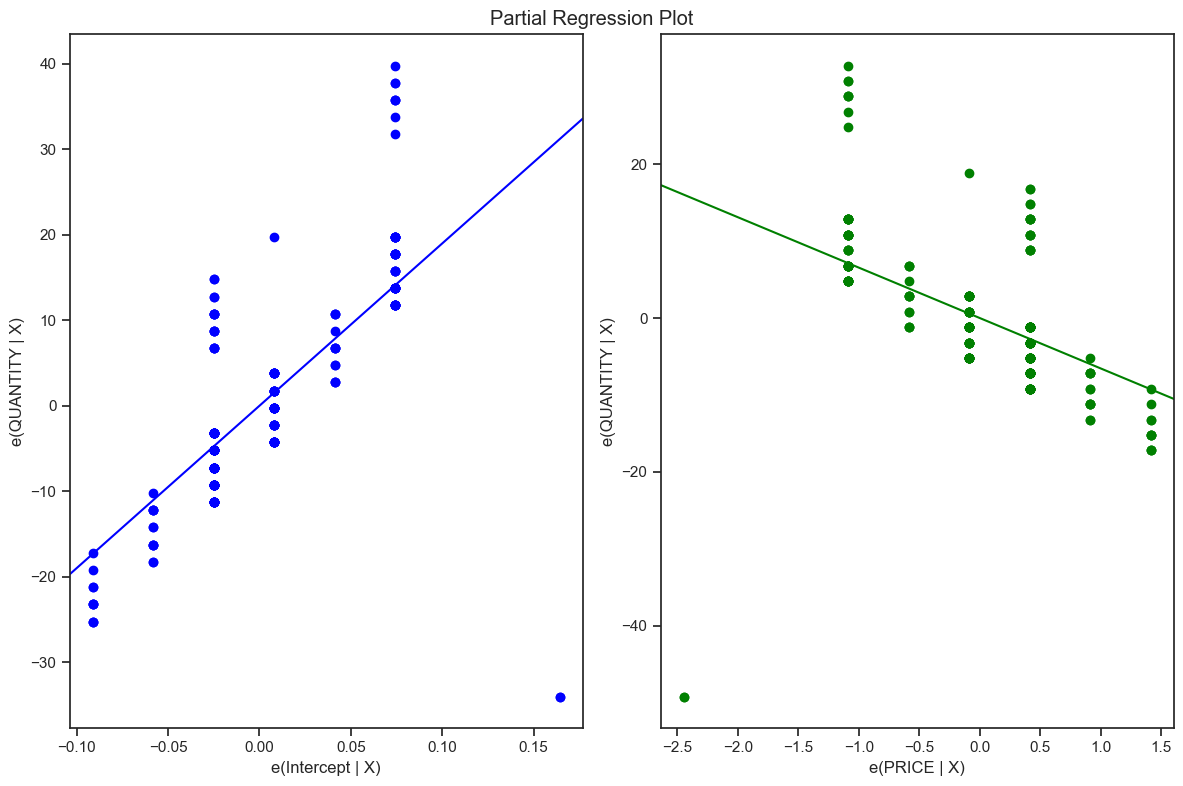

In [64]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)
colors = ['blue', 'green', 'red', 'purple'] 
for i, ax in enumerate(fig.axes):
    color = colors[i % len(colors)]  
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)

plt.show()


In [65]:
bau_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
40     1070              0    BURGER    2015-01-02  14.00       102  2015   
41     2051              2    BURGER    2015-01-02  11.53        30  2015   
42     2051              2      COKE    2015-01-02  11.53        30  2015   
43     2052              2    BURGER    2015-01-02  11.45        22  2015   
44     2052              2  LEMONADE    2015-01-02  11.45        22  2015   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
40  No Holiday           0               0                 37.4           1   
41  No Holiday           0               0                 37.4           1   
42  No Holiday           0               0                 37.4           1   
43  No Holiday           0               0                 37.4           1   
44  No Holiday           0               0                 37.4           1   

    WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
40        1   1428.0       1428.0      1       1428.0  
41        1    345.9        345.9      1        345.9  
42        1    345.9        345.9      1        345.9  
43        1    251.9        251.9      1        251.9  
44        1    251.9        251.9      1        251.9

In [66]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
40      1070              0    BURGER    2015-01-02   14.0       102  2015   
80      1070              0    BURGER    2012-01-04   15.5        88  2012   
119     1070              0    BURGER    2015-01-05   14.0       104  2015   
151     1070              0    BURGER    2015-01-06   14.0        98  2015   
175     1070              0    BURGER    2015-01-07   14.0       104  2015   

        HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
40   No Holiday           0               0                 37.4           1   
80   No Holiday           0               0                 32.0           1   
119  No Holiday           0               0                 33.8           1   
151  No Holiday           0               0                 32.0           1   
175  No Holiday           0               0                 32.0           1   

     WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
40         1   1428.0       1428.0      1       1428.0  
80         1   1364.0       1364.0      1       1364.0  
119        2   1456.0       1456.0      1       1456.0  
151        2   1372.0       1372.0      1       1372.0  
175        2   1456.0       1456.0      1       1456.0

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    185.0          185.0  185.000000  185.000000   185.000000   
mean    1070.0            0.0   15.096108   88.724324  2013.275676   
std        0.0            0.0    0.747025    8.452855     1.095794   
min     1070.0            0.0   12.640000   42.000000  2012.000000   
25%     1070.0            0.0   14.500000   84.000000  2012.000000   
50%     1070.0            0.0   15.500000   88.000000  2013.000000   
75%     1070.0            0.0   15.500000   94.000000  2014.000000   
max     1070.0            0.0   16.500000  104.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR    WEEKDAY  \
count       185.0           185.0           185.000000       185.0      185.0   
mean          0.0             0.0            57.102703         1.0  25.918919   
std           0.0             0.0            16.630931         0.0  14.082402   
min           0.0             0.0            28.400000         1.0        1.0   
25%           0.0             0.0            41.000000         1.0       14.0   
50%           0.0             0.0            59.000000         1.0       23.0   
75%           0.0             0.0            73.400000         1.0       37.0   
max           0.0             0.0            86.000000         1.0       50.0   

           revenue  total_sales       MONTH  TOTAL_SALES  
count   185.000000   185.000000  185.000000   185.000000  
mean   1336.258162  1336.258162    6.600000  1336.258162  
std      99.589159    99.589159    3.222206    99.589159  
min     530.880000   530.880000    1.000000   530.880000  
25%    1302.000000  1302.000000    4.000000  1302.000000  
50%    1344.000000  1344.000000    6.000000  1344.000000  
75%    1380.000000  1380.000000    9.000000  1380.000000  
max    1456.000000  1456.000000   12.000000  1456.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

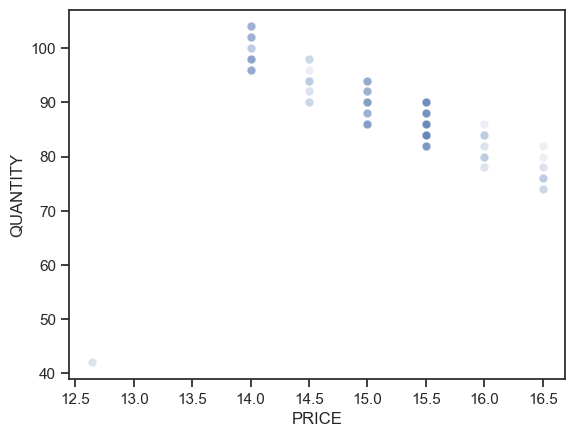

In [67]:
# This is for the normal condition i.e.when No holiday, no lunchbreak, no weekend and for outdoor
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     60.67
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.86e-13
Time:                        23:14:34   Log-Likelihood:                -630.40
No. Observations:                 185   AIC:                             1265.
Df Residuals:                     183   BIC:                             1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.9606     10.956     15.878      0.0

<Figure size 1200x800 with 0 Axes>

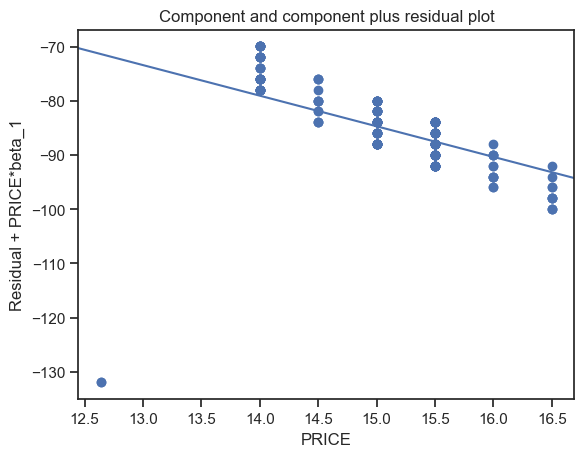

In [68]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

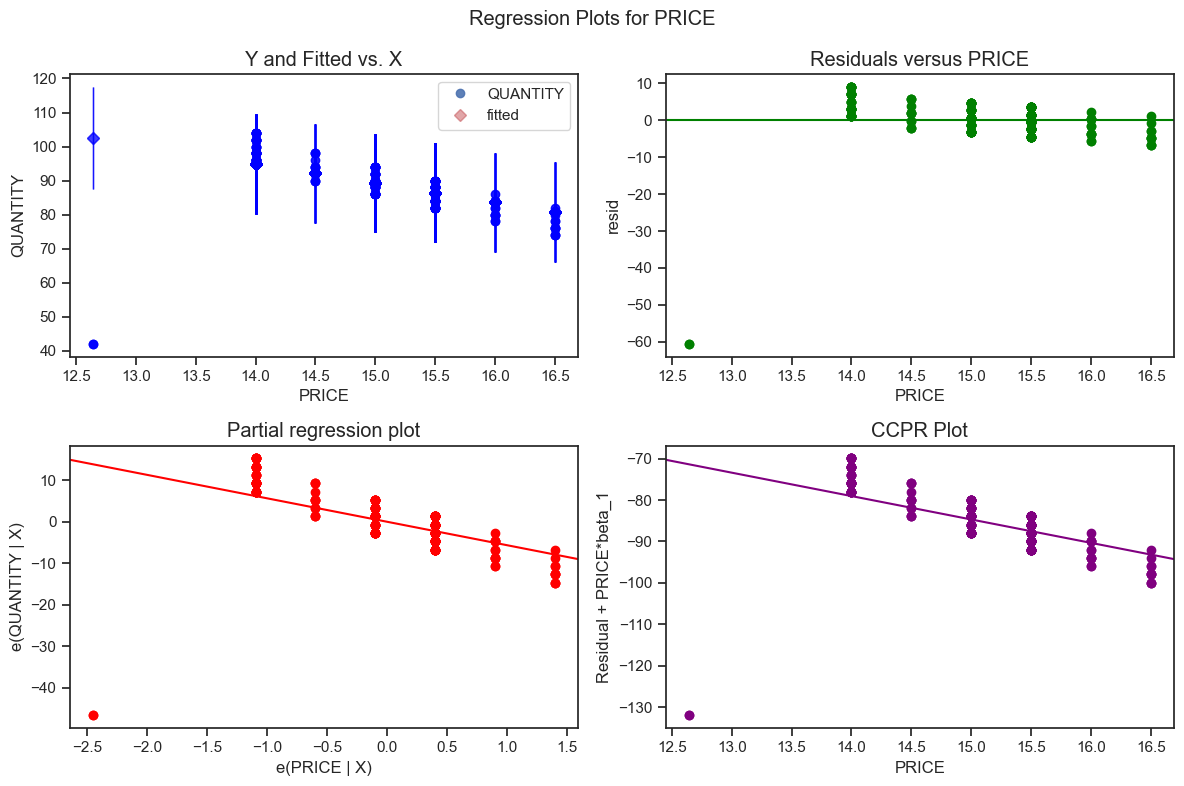

In [69]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Assuming burger_model is already fitted using ols
# burger_model = ols("QUANTITY ~ PRICE", data=burger_data).fit()
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)
colors = ['blue', 'green', 'red', 'purple']  
for ax, color in zip(fig.get_axes(), colors):
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)

plt.show()


SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
1      2051              2    BURGER    2012-01-01  12.73        22  2012   
9      2051              2    BURGER    2014-01-01  13.27        22  2014   
17     2051              2    BURGER    2015-01-01  11.53        24  2015   
25     2051              2    BURGER    2013-01-02  13.13        28  2013   
33     2051              2    BURGER    2014-01-02  13.27        22  2014   

     HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
1   New Year           1               0                 24.8           0   
9   New Year           0               0                 19.4           0   
17  New Year           0               0                 37.4           1   
25  New Year           0               0                 28.4           0   
33  New Year           0               0                 14.0           0   

    WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
1        52   280.06       280.06      1       280.06  
9         1   291.94       291.94      1       291.94  
17        1   276.72       276.72      1       276.72  
25        1   367.64       367.64      1       367.64  
33        1   291.94       291.94      1       291.94

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    540.0          540.0  540.000000  540.000000   540.000000   
mean    2051.0            2.0   12.390519   29.129630  2013.394444   
std        0.0            0.0    0.745881   10.920095     1.078533   
min     2051.0            2.0   10.970000   12.000000  2012.000000   
25%     2051.0            2.0   11.530000   24.000000  2012.000000   
50%     2051.0            2.0   12.660000   28.000000  2013.000000   
75%     2051.0            2.0   13.080000   34.000000  2014.000000   
max     2051.0            2.0   15.500000  178.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR    WEEKDAY  \
count  540.000000      540.000000           540.000000  540.000000      540.0   
mean     0.281481        0.200000            55.840000    0.838889  24.024074   
std      0.450139        0.400371            20.453291    0.367974  14.598313   
min      0.000000        0.000000            14.000000    0.000000        1.0   
25%      0.000000        0.000000            35.600000    1.000000      10.75   
50%      0.000000        0.000000            60.800000    1.000000       23.0   
75%      1.000000        0.000000            75.200000    1.000000       36.0   
max      1.000000        1.000000            86.000000    1.000000       52.0   

           revenue  total_sales       MONTH  TOTAL_SALES  
count   540.000000   540.000000  540.000000   540.000000  
mean    361.485815   361.485815    6.177778   361.485815  
std     162.918656   162.918656    3.354982   162.918656  
min     151.920000   151.920000    1.000000   151.920000  
25%     299.780000   299.780000    3.000000   299.780000  
50%     351.040000   351.040000    6.000000   351.040000  
75%     413.640000   413.640000    9.000000   413.640000  
max    2759.000000  2759.000000   12.000000  2759.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

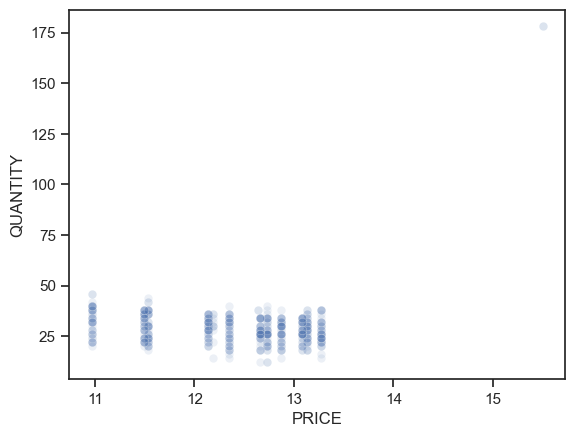

In [70]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]
burger_2051.head()
burger_2051.describe()
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.515
Date:                Fri, 01 Mar 2024   Prob (F-statistic):              0.113
Time:                        23:14:35   Log-Likelihood:                -2055.4
No. Observations:                 540   AIC:                             4115.
Df Residuals:                     538   BIC:                             4123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7549      7.817      2.143      0.0

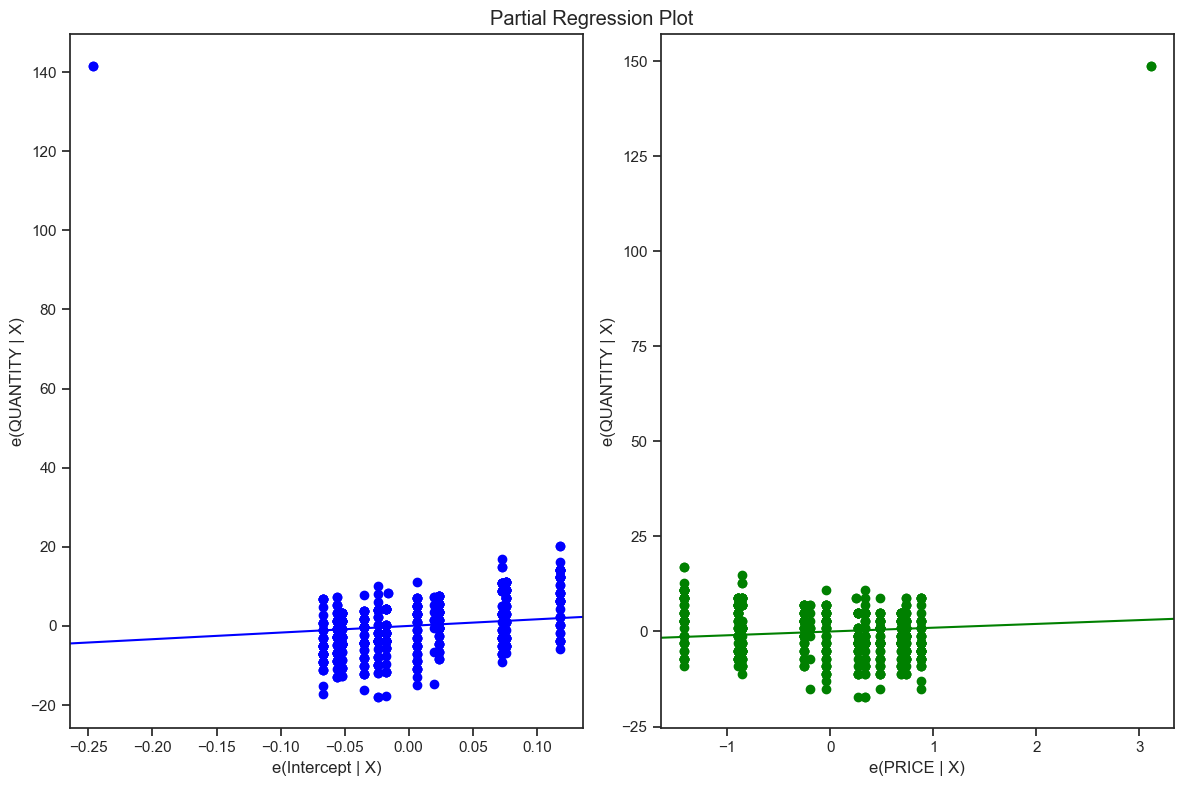

In [71]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Your model fitting
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
# Creating the figure for the partial regression plots
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)
for i, ax in enumerate(fig.axes):
    color = colors[i % len(colors)]
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)

plt.show()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
2      2051              2      COKE    2012-01-01  12.73        22  2012   
7      2053              2      COKE    2012-01-01  12.60        30  2012   
10     2051              2      COKE    2014-01-01  13.27        22  2014   
15     2053              2      COKE    2014-01-01  12.37        44  2014   
18     2051              2      COKE    2015-01-01  11.53        24  2015   

     HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
2   New Year           1               0                 24.8           0   
7   New Year           1               0                 24.8           0   
10  New Year           0               0                 19.4           0   
15  New Year           0               0                 19.4           0   
18  New Year           0               0                 37.4           1   

    WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
2        52   280.06       280.06      1       280.06  
7        52   378.00       378.00      1       378.00  
10        1   291.94       291.94      1       291.94  
15        1   544.28       544.28      1       544.28  
18        1   276.72       276.72      1       276.72

(1115, 17)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  1115.000000    1115.000000  1115.000000  1115.000000  1115.000000   
mean   2084.770404       1.935426    12.261283    38.661883  2013.404484   
std     179.496056       0.353681     1.008924    15.681626     1.077174   
min    2051.000000       0.000000    10.450000    12.000000  2012.000000   
25%    2051.000000       2.000000    11.490000    28.000000  2012.000000   
50%    2053.000000       2.000000    12.420000    36.000000  2013.000000   
75%    2053.000000       2.000000    12.820000    46.000000  2014.000000   
max    3067.000000       2.000000    16.500000   178.000000  2015.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  \
count  1115.000000     1115.000000          1115.000000  1115.000000   
mean      0.279821        0.200000            55.860090     0.839462   
std       0.449112        0.400179            20.442943     0.367269   
min       0.000000        0.000000            14.000000     0.000000   
25%       0.000000        0.000000            35.600000     1.000000   
50%       0.000000        0.000000            60.800000     1.000000   
75%       1.000000        0.000000            75.200000     1.000000   
max       1.000000        1.000000            86.000000     1.000000   

         WEEKDAY      revenue  total_sales        MONTH  TOTAL_SALES  
count     1115.0  1115.000000  1115.000000  1115.000000  1115.000000  
mean   24.074439   474.532430   474.532430     6.190135   474.532430  
std    14.592761   218.508162   218.508162     3.353994   218.508162  
min          1.0   151.920000   151.920000     1.000000   151.920000  
25%         11.0   348.660000   348.660000     3.000000   348.660000  
50%         23.0   430.440000   430.440000     6.000000   430.440000  
75%         36.0   573.160000   573.160000     9.000000   573.160000  
max         52.0  2759.000000  2759.000000    12.000000  2759.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

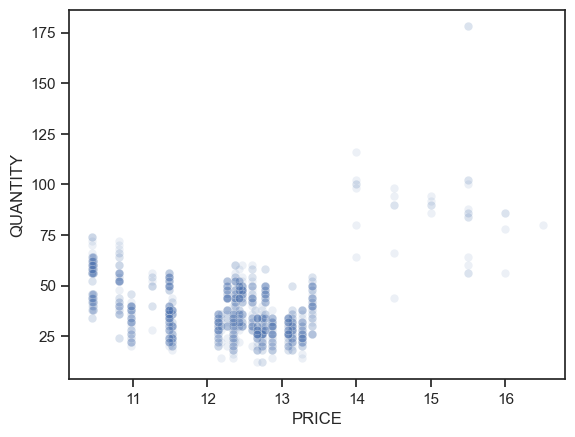

In [72]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

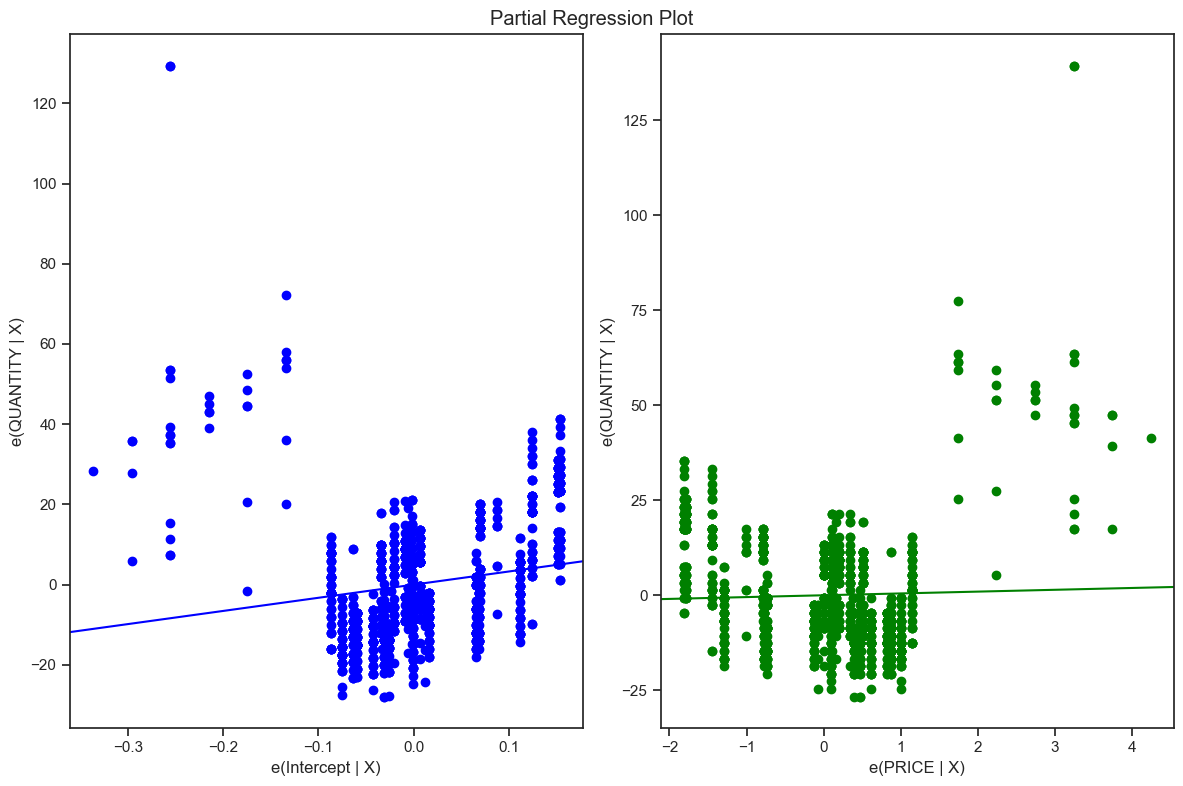

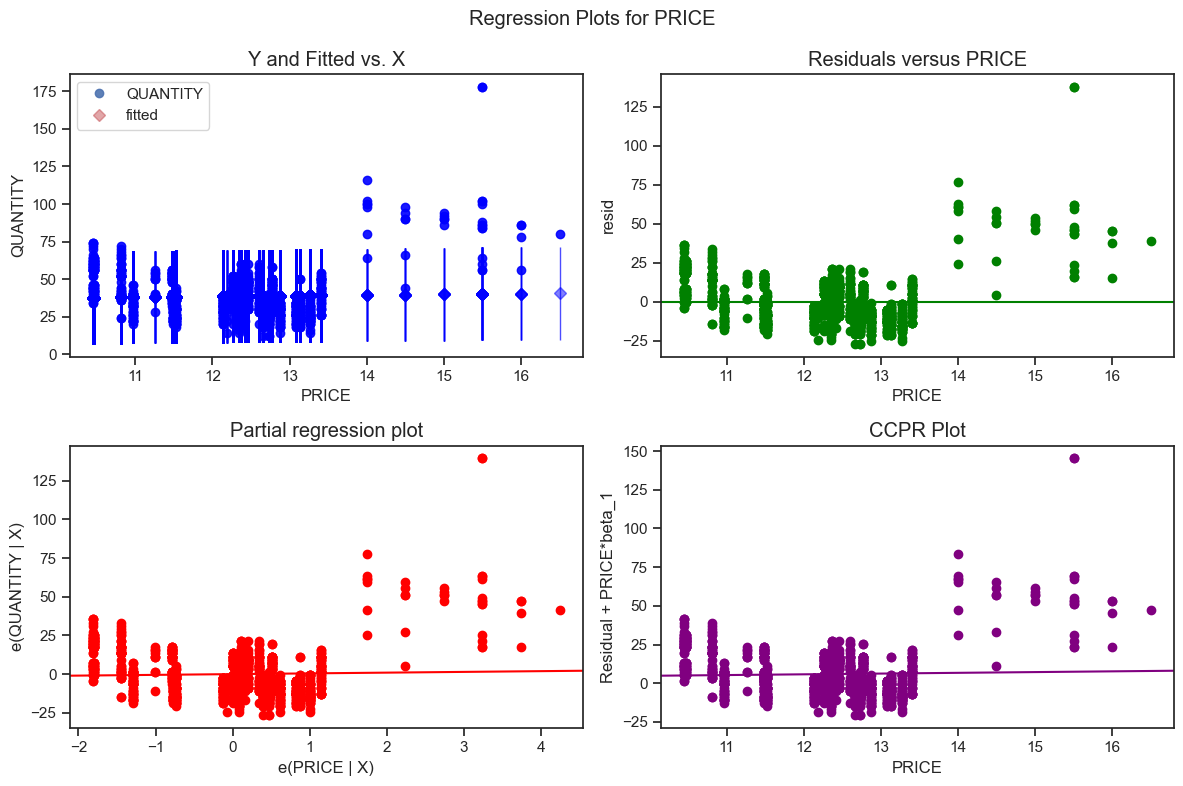

In [73]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
colors = ['blue', 'green', 'red', 'purple']  
for ax, color in zip(fig.get_axes(), colors):
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)
plt.show()
# Regression Exogenous Plot
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)
for ax, color in zip(fig.get_axes(), colors):
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)
plt.show()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
6      2053              2    COFFEE    2012-01-01  12.60        30  2012   
14     2053              2    COFFEE    2014-01-01  12.37        44  2014   
22     2053              2    COFFEE    2015-01-01  10.81        36  2015   
30     2053              2    COFFEE    2013-01-02  13.41        40  2013   
38     2053              2    COFFEE    2014-01-02  12.37        40  2014   

     HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
6   New Year           1               0                 24.8           0   
14  New Year           0               0                 19.4           0   
22  New Year           0               0                 37.4           1   
30  New Year           0               0                 28.4           0   
38  New Year           0               0                 14.0           0   

    WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
6        52   378.00       378.00      1       378.00  
14        1   544.28       544.28      1       544.28  
22        1   389.16       389.16      1       389.16  
30        1   536.40       536.40      1       536.40  
38        1   494.80       494.80      1       494.80

(571, 17)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count   571.000000     571.000000  571.000000  571.000000   571.000000   
mean   2109.154116       1.887916   12.117338   46.956217  2013.399299   
std     230.664952       0.460409    1.190557   13.109117     1.083334   
min    2053.000000       0.000000   10.450000   20.000000  2012.000000   
25%    2053.000000       2.000000   10.810000   38.000000  2012.000000   
50%    2053.000000       2.000000   12.370000   46.000000  2013.000000   
75%    2053.000000       2.000000   12.600000   52.000000  2014.000000   
max    3055.000000       2.000000   16.500000  120.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR    WEEKDAY  \
count  571.000000      571.000000           571.000000  571.000000      571.0   
mean     0.288967        0.206655            55.885464    0.837128  24.054291   
std      0.453680        0.405261            20.540664    0.369573   14.61526   
min      0.000000        0.000000            14.000000    0.000000        1.0   
25%      0.000000        0.000000            35.600000    1.000000       10.0   
50%      0.000000        0.000000            60.800000    1.000000       23.0   
75%      1.000000        0.000000            75.200000    1.000000       36.0   
max      1.000000        1.000000            86.000000    1.000000       52.0   

           revenue  total_sales       MONTH  TOTAL_SALES  
count   571.000000   571.000000  571.000000   571.000000  
mean    569.961401   569.961401    6.185639   569.961401  
std     189.683946   189.683946    3.359804   189.683946  
min     245.200000   245.200000    1.000000   245.200000  
25%     449.480000   449.480000    3.000000   449.480000  
50%     563.220000   563.220000    6.000000   563.220000  
75%     623.000000   623.000000    9.000000   623.000000  
max    1680.000000  1680.000000   12.000000  1680.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

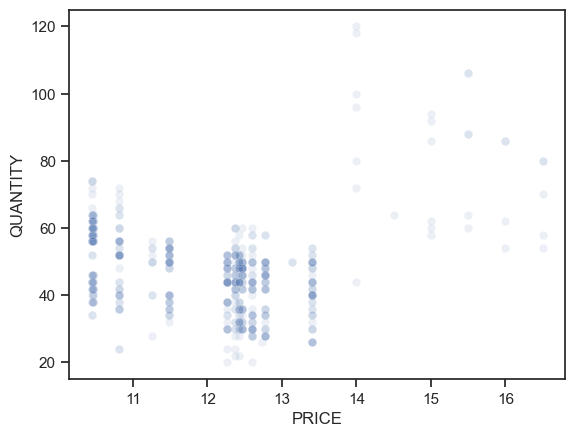

In [74]:
coffee = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
coffee.head()
coffee.shape
coffee.describe()
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 0.1)

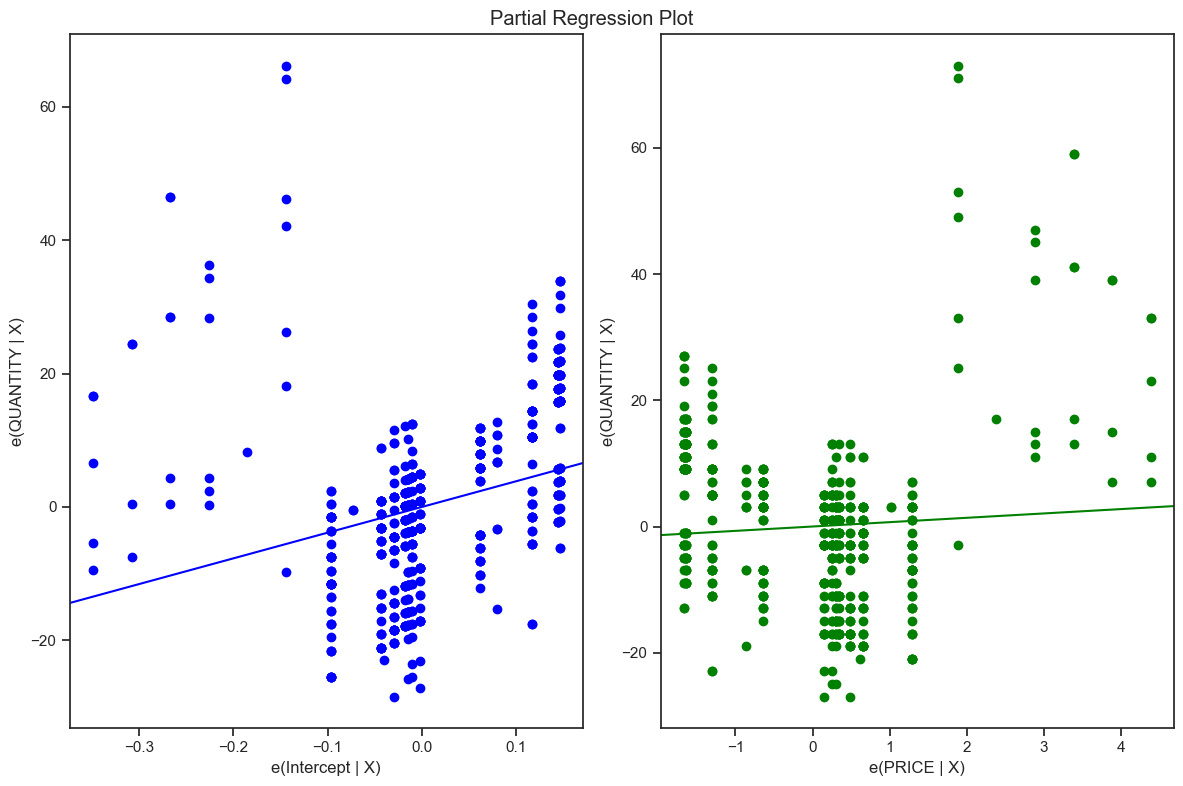

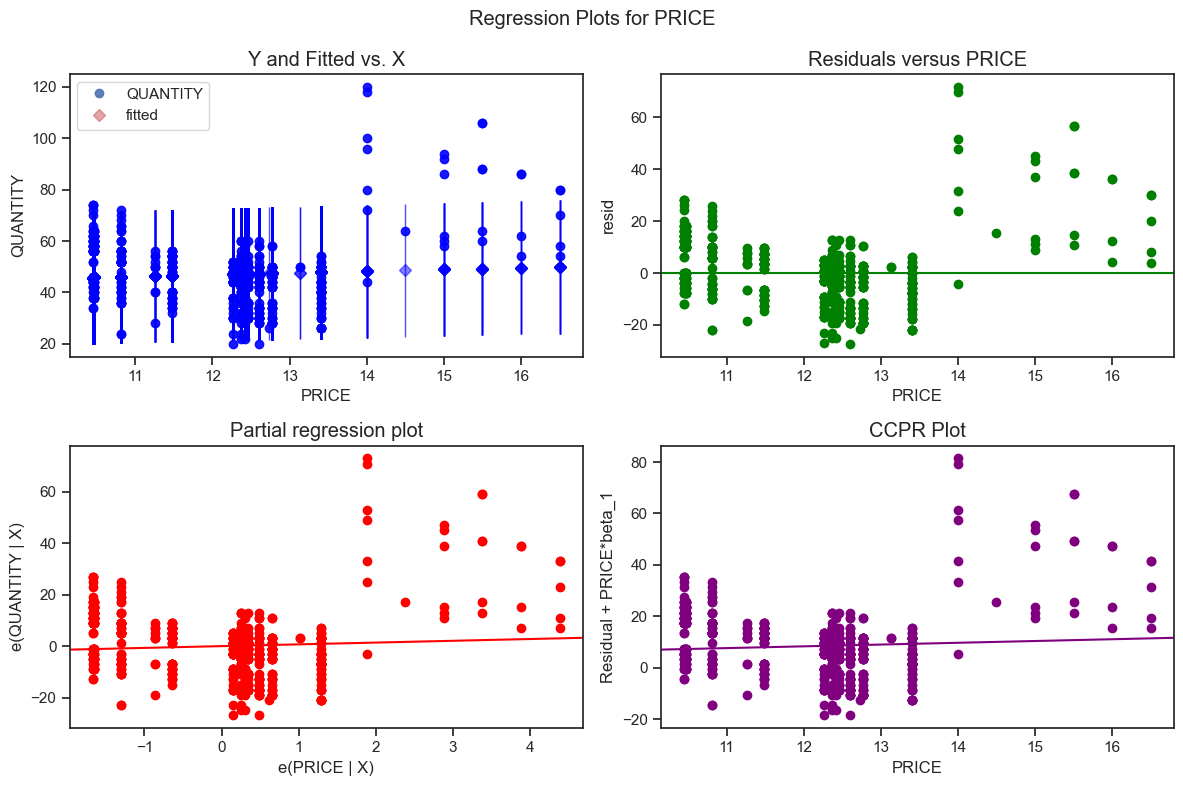

In [75]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
coffee_model = ols("QUANTITY ~ PRICE", data=coffee).fit()
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(coffee_model, fig=fig)
colors = ['blue', 'green', 'red', 'purple']  
for ax, color in zip(fig.get_axes(), colors):
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)
plt.show()
# Regression Exogenous Plot
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(coffee_model, 'PRICE', fig=fig)
for ax, color in zip(fig.get_axes(), colors):
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)
plt.show()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
4      2052              2  LEMONADE    2012-01-01  12.75        18  2012   
12     2052              2  LEMONADE    2014-01-01  11.96        20  2014   
20     2052              2  LEMONADE    2015-01-01  11.45        20  2015   
28     2052              2  LEMONADE    2013-01-02  12.64        16  2013   
36     2052              2  LEMONADE    2014-01-02  11.96        22  2014   

     HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
4   New Year           1               0                 24.8           0   
12  New Year           0               0                 19.4           0   
20  New Year           0               0                 37.4           1   
28  New Year           0               0                 28.4           0   
36  New Year           0               0                 14.0           0   

    WEEKDAY  revenue  total_sales  MONTH  TOTAL_SALES  
4        52   229.50       229.50      1       229.50  
12        1   239.20       239.20      1       239.20  
20        1   229.00       229.00      1       229.00  
28        1   202.24       202.24      1       202.24  
36        1   263.12       263.12      1       263.12

(576, 17)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count   576.000000     576.000000  576.000000  576.000000   576.000000   
mean   2113.000000       1.875000   12.191510   24.298611  2013.390625   
std     236.457331       0.484544    1.118223   15.878048     1.078735   
min    2052.000000       0.000000   10.120000    8.000000  2012.000000   
25%    2052.000000       2.000000   11.427500   18.000000  2012.000000   
50%    2052.000000       2.000000   12.260000   20.000000  2013.000000   
75%    2052.000000       2.000000   12.720000   24.000000  2014.000000   
max    3028.000000       2.000000   16.500000  106.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR    WEEKDAY  \
count  576.000000      576.000000           576.000000  576.000000      576.0   
mean     0.276042        0.199653            55.818750    0.840278  24.076389   
std      0.447426        0.400087            20.489198    0.366667  14.611647   
min      0.000000        0.000000            14.000000    0.000000        1.0   
25%      0.000000        0.000000            35.600000    1.000000       11.0   
50%      0.000000        0.000000            60.800000    1.000000       23.0   
75%      1.000000        0.000000            75.200000    1.000000       36.0   
max      1.000000        1.000000            86.000000    1.000000       52.0   

           revenue  total_sales       MONTH  TOTAL_SALES  
count   576.000000   576.000000  576.000000   576.000000  
mean    306.407674   306.407674    6.190972   306.407674  
std     251.096380   251.096380    3.357793   251.096380  
min      98.080000    98.080000    1.000000    98.080000  
25%     205.600000   205.600000    3.000000   205.600000  
50%     249.640000   249.640000    6.000000   249.640000  
75%     294.240000   294.240000    9.000000   294.240000  
max    1643.000000  1643.000000   12.000000  1643.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

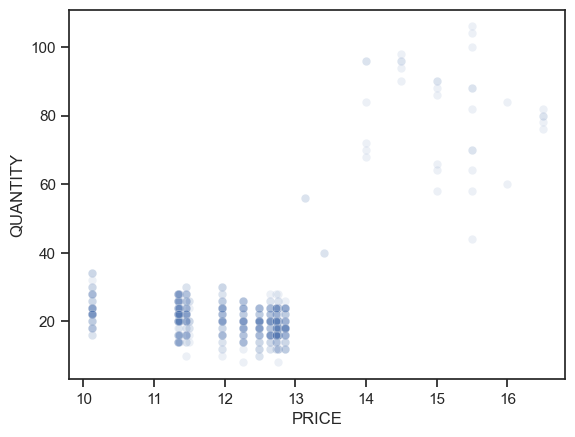

In [76]:
lemonade = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
lemonade.head()
lemonade.shape
lemonade.describe()
sns.scatterplot(x = lemonade.PRICE, y = lemonade.QUANTITY , alpha = 0.1)

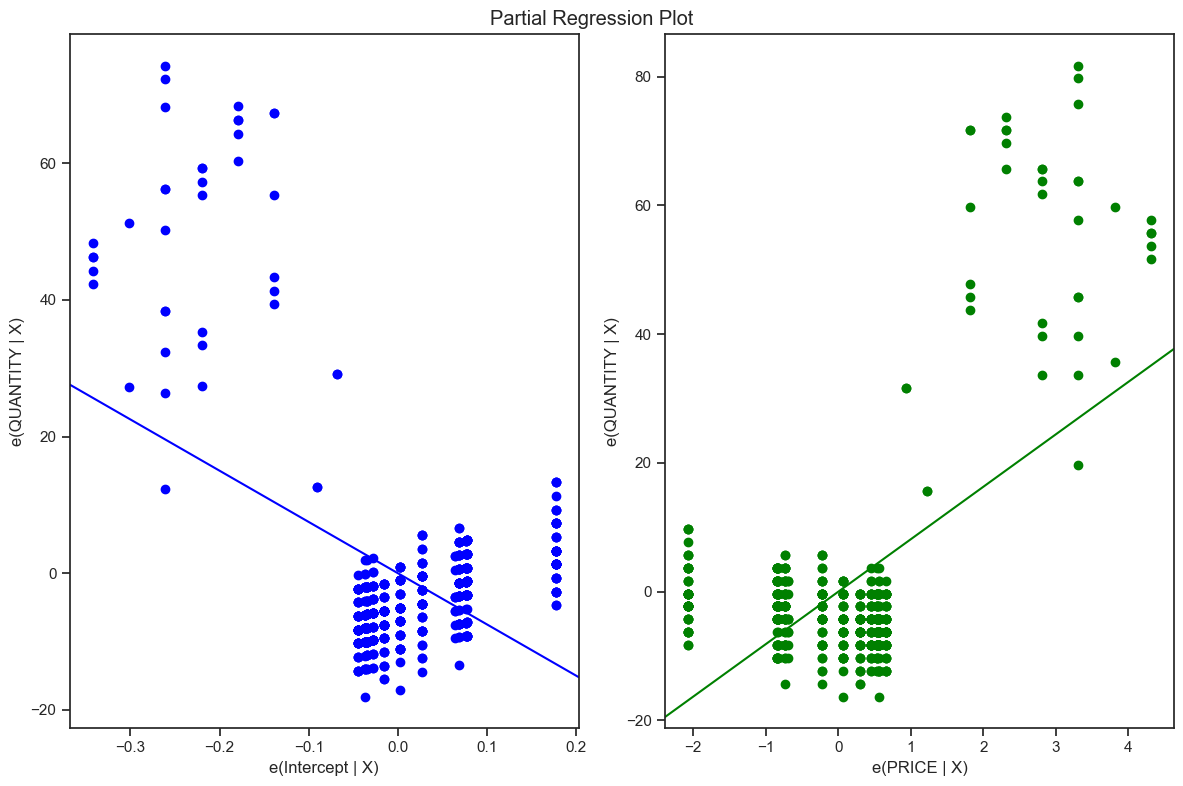

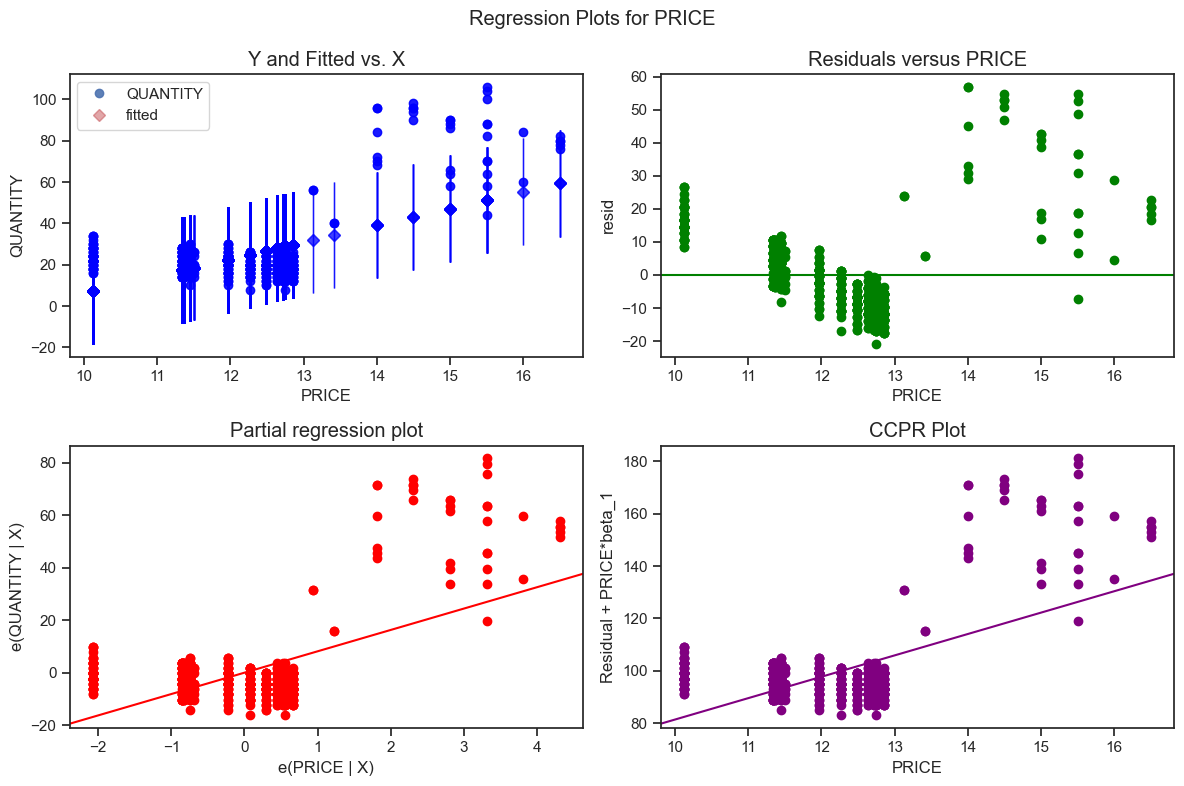

In [77]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Assuming lemonade_model is already fitted using ols
lemonade_model = ols("QUANTITY ~ PRICE", data=lemonade).fit()
# Part Regression Grid
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(lemonade_model, fig=fig)
# Customizing colors for part regression grid
colors = ['blue', 'green', 'red', 'purple']  # Define your colors here
for ax, color in zip(fig.get_axes(), colors):
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)
plt.show()
# Regression Exogenous Plot
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(lemonade_model, 'PRICE', fig=fig)

# Customizing colors for regression exogenous plot
for ax, color in zip(fig.get_axes(), colors):
    for line in ax.get_lines():
        line.set_color(color)
    for collection in ax.collections:
        collection.set_color(color)
plt.show()

In [78]:
# Lets find elasticities for all items
elasticities = {}

In [79]:
# Generic function to get price elasticities
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -5.6462430872355345
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     60.67
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.86e-13
Time:                        23:14:39   Log-Likelihood:                -630.40
No. Observations:                 185   AIC:                             1265.
Df Residuals:                     183   BIC:                             1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

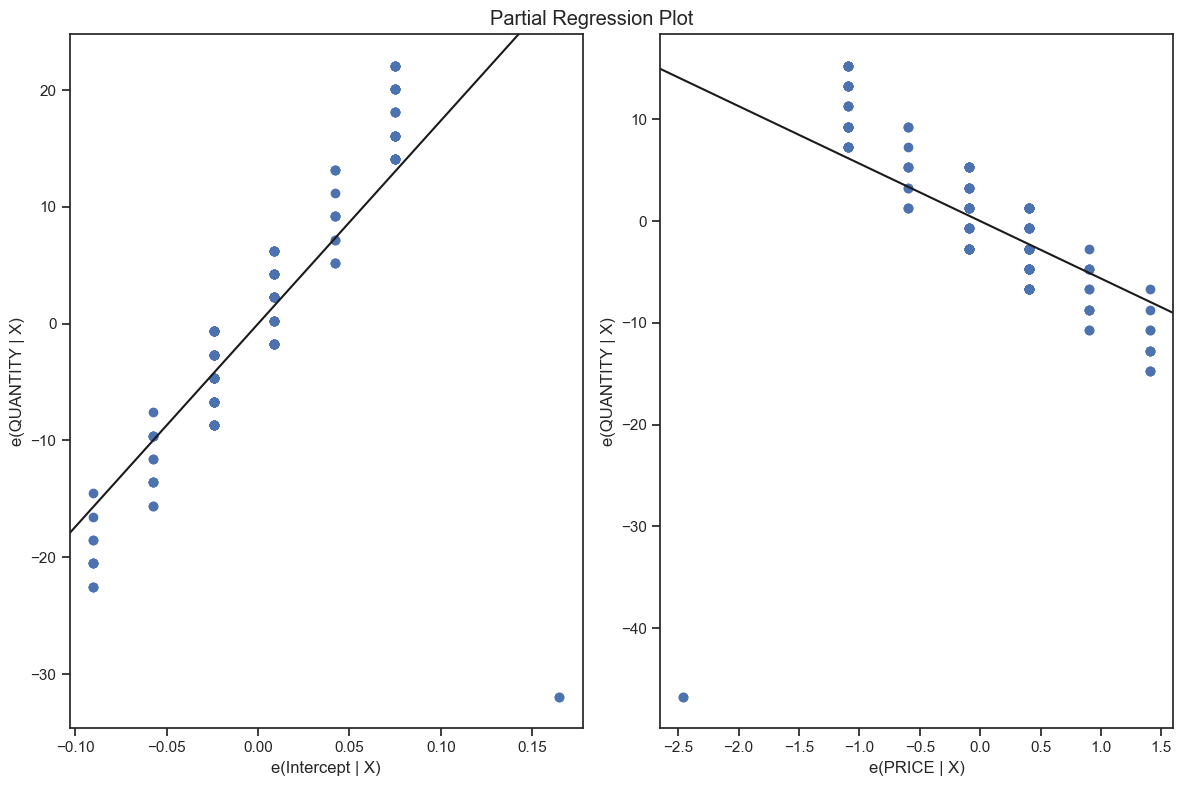

In [80]:
# Apply function
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: 3.691524562279276
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     9.803
Date:                Fri, 01 Mar 2024   Prob (F-statistic):            0.00198
Time:                        23:14:40   Log-Likelihood:                -912.58
No. Observations:                 225   AIC:                             1829.
Df Residuals:                     223   BIC:                             1836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

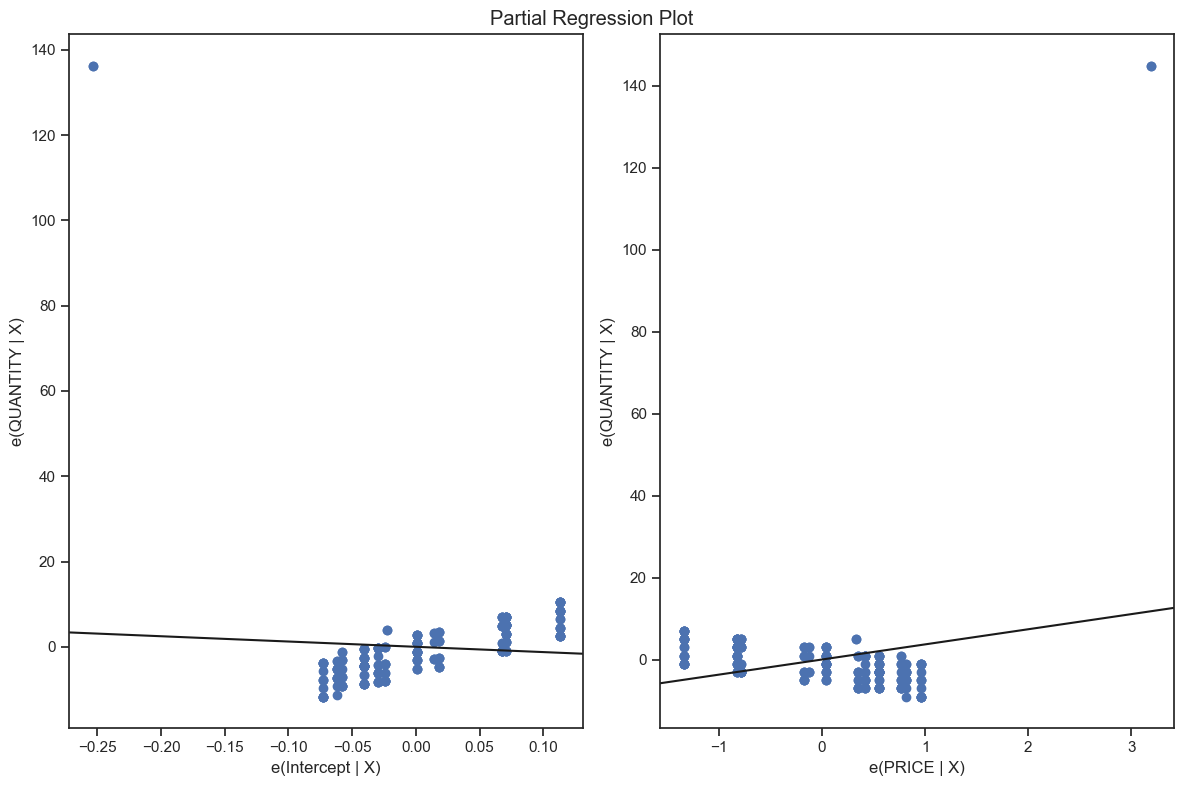

In [81]:
# for 2051 and other burger with unique sell id
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -1.2265886170992555
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     10.81
Date:                Fri, 01 Mar 2024   Prob (F-statistic):            0.00117
Time:                        23:14:40   Log-Likelihood:                -672.11
No. Observations:                 225   AIC:                             1348.
Df Residuals:                     223   BIC:                             1355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

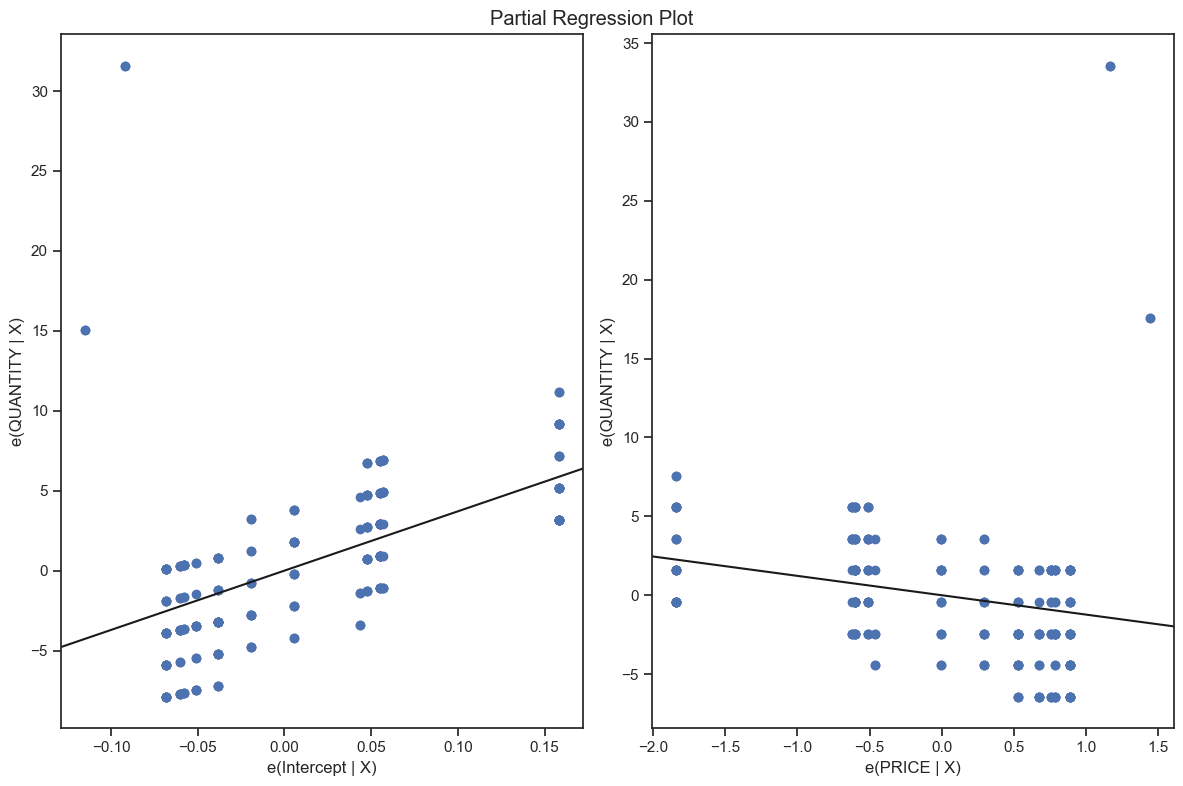

In [82]:
# burger 2052
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

Price elasticity of the product: -5.65434723895346
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     802.6
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.13e-75
Time:                        23:14:40   Log-Likelihood:                -560.76
No. Observations:                 224   AIC:                             1126.
Df Residuals:                     222   BIC:                             1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

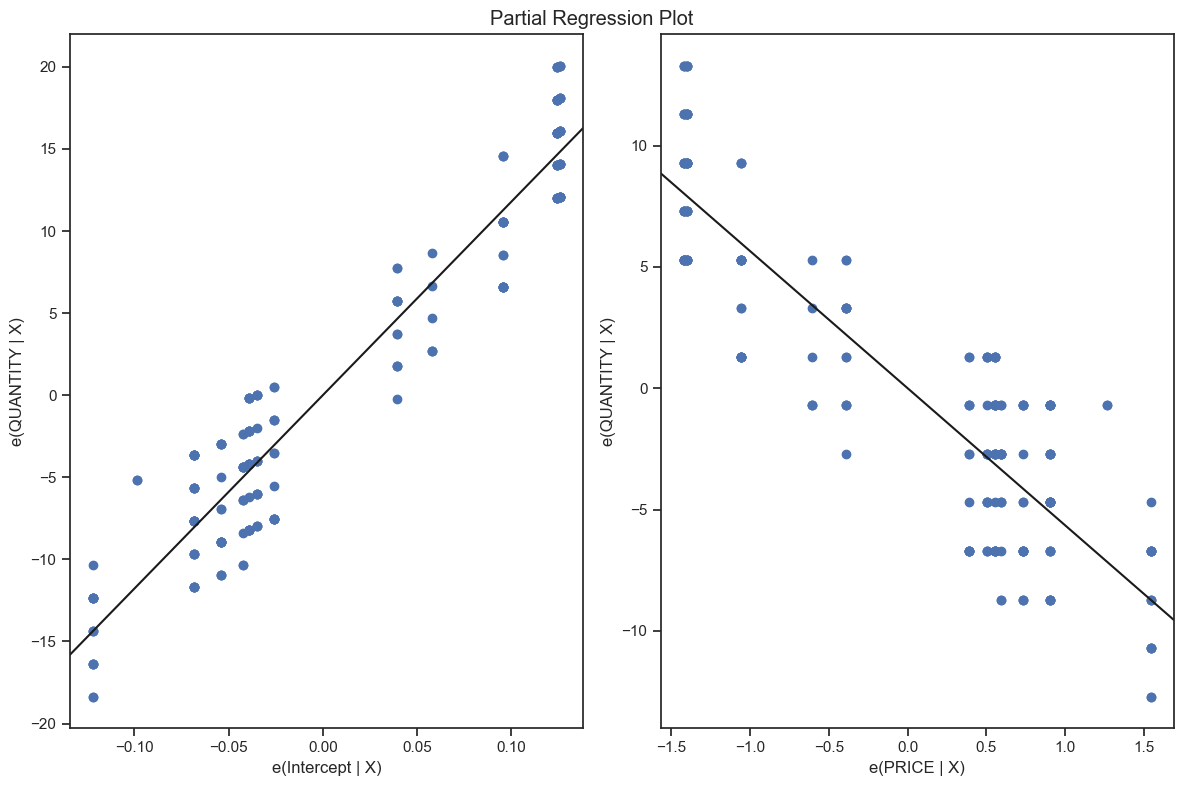

In [83]:
# burger 2053
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

Price elasticity of the product: 1.1731480027522256
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.596
Date:                Fri, 01 Mar 2024   Prob (F-statistic):              0.108
Time:                        23:14:41   Log-Likelihood:                -1972.3
No. Observations:                 466   AIC:                             3949.
Df Residuals:                     464   BIC:                             3957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(1.1731480027522256,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2883c985590>)

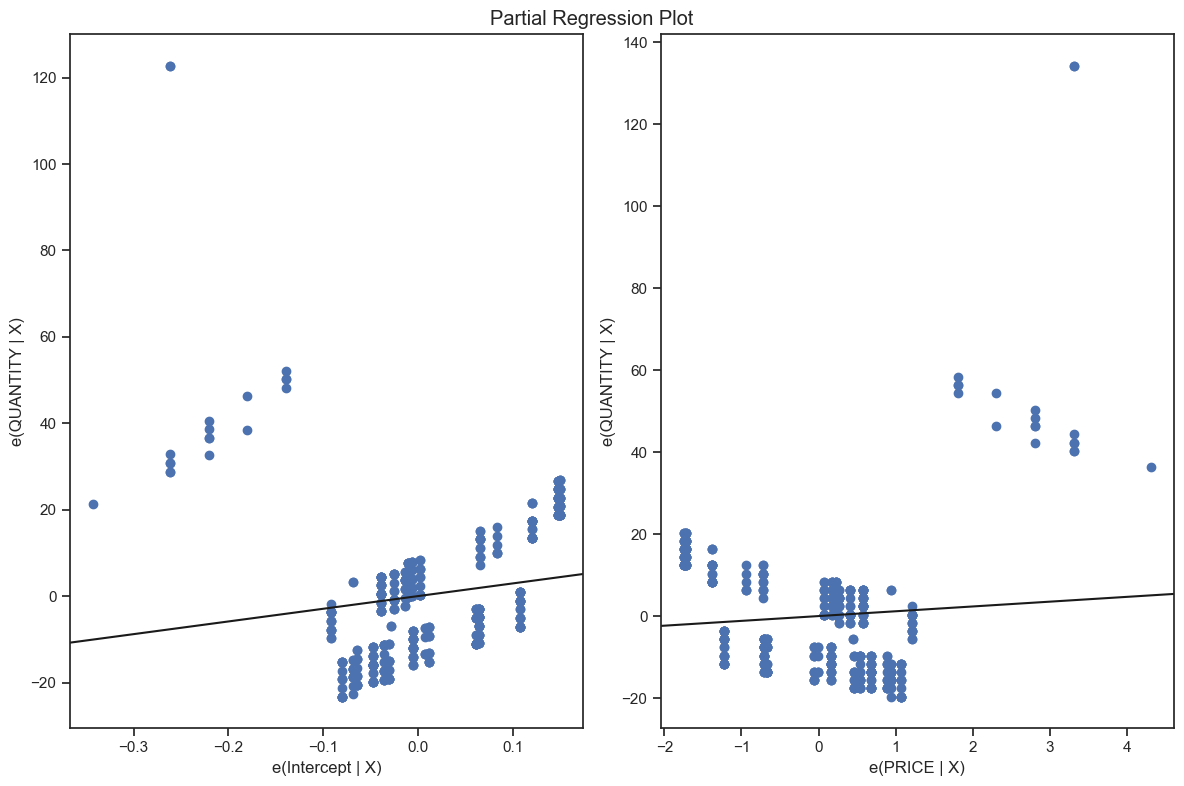

In [84]:
# coke data
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

Price elasticity of the product: 3.691524562279276
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     9.803
Date:                Fri, 01 Mar 2024   Prob (F-statistic):            0.00198
Time:                        23:14:41   Log-Likelihood:                -912.58
No. Observations:                 225   AIC:                             1829.
Df Residuals:                     223   BIC:                             1836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

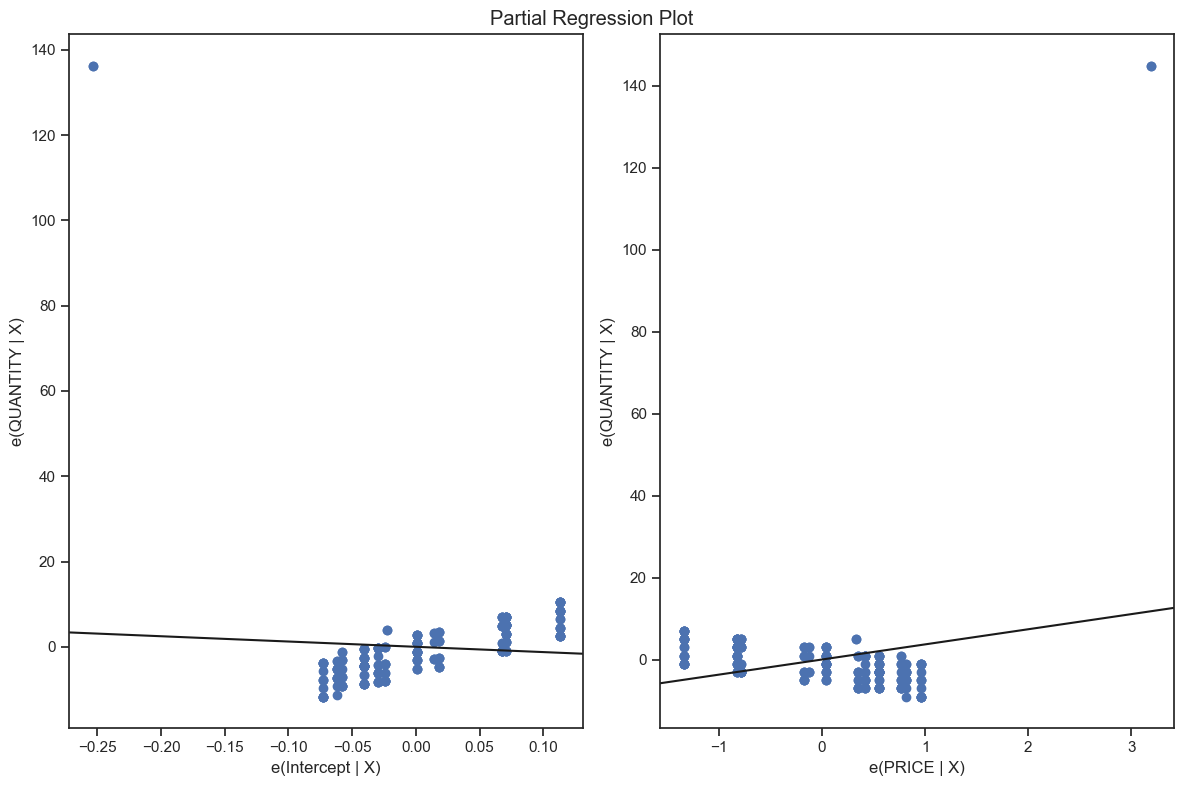

In [85]:
# coke 2051
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)

Price elasticity of the product: -5.65434723895346
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     802.6
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.13e-75
Time:                        23:14:42   Log-Likelihood:                -560.76
No. Observations:                 224   AIC:                             1126.
Df Residuals:                     222   BIC:                             1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

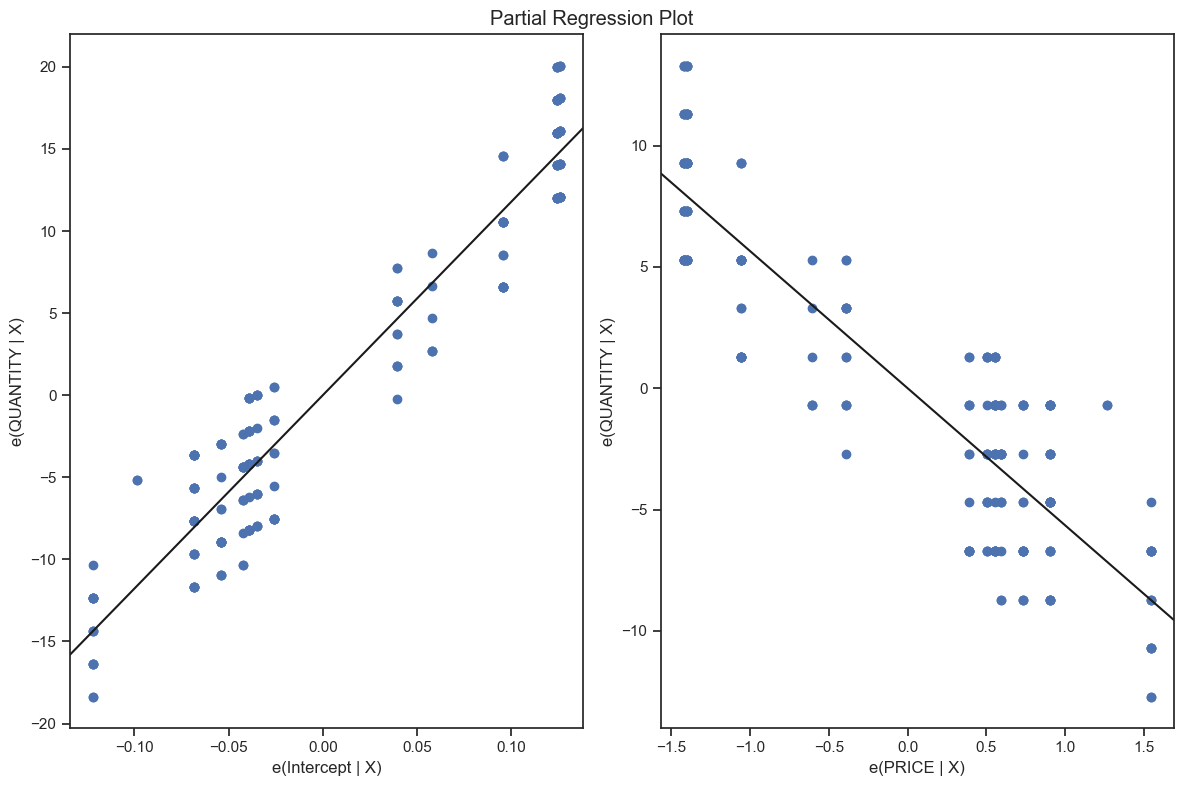

In [86]:
# coke 2053
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticity of the product: -1.2265886170992555
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     10.81
Date:                Fri, 01 Mar 2024   Prob (F-statistic):            0.00117
Time:                        23:14:42   Log-Likelihood:                -672.11
No. Observations:                 225   AIC:                             1348.
Df Residuals:                     223   BIC:                             1355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

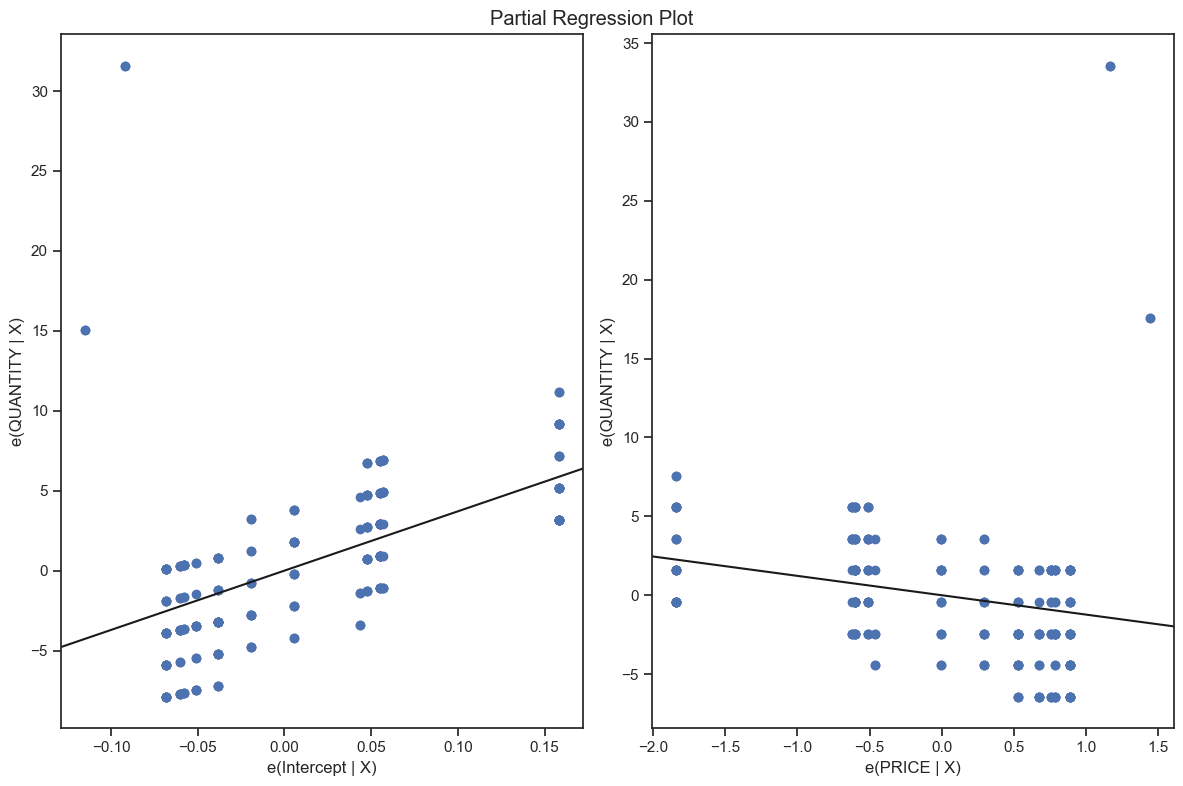

In [87]:
# lemonade 2052
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

Price elasticity of the product: -5.65434723895346
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     802.6
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.13e-75
Time:                        23:14:42   Log-Likelihood:                -560.76
No. Observations:                 224   AIC:                             1126.
Df Residuals:                     222   BIC:                             1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

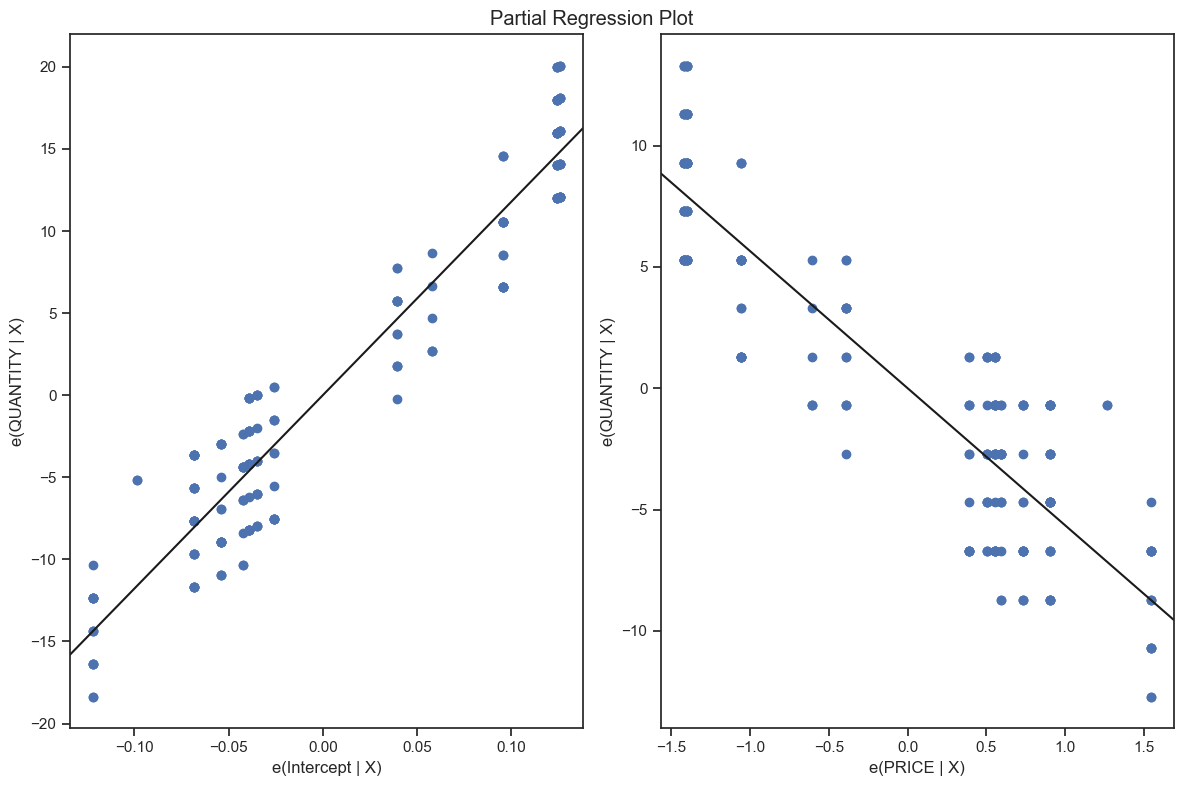

In [88]:
# coffe 2053
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

In [89]:
elasticities

{'burger_1070': -5.6462430872355345,
 'burger_2051': 3.691524562279276,
 'burger_2052': -1.2265886170992555,
 'burger_2053': -5.65434723895346,
 'coke_2051': 3.691524562279276,
 'coke_2053': -5.65434723895346,
 'lemonade_2052': -1.2265886170992555,
 'coffee_2053': -5.65434723895346}

In [90]:
coke_data = coke_data_2053

In [91]:
coke_data.PRICE.max()

13.41

In [92]:
coke_data.PRICE.min()

10.45

In [93]:
# random price points
start_price = 9.5
end_price = 20

In [94]:
buying_price_coke = 9

In [95]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
test['PRICE'] = np.arange(start_price, end_price,0.01)
test['QUANTITY'] = model_coke_2051.predict(test['PRICE'])
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]
test

PRICE   QUANTITY      PROFIT
0      9.50  22.673601   11.336801
1      9.51  22.710516   11.582363
2      9.52  22.747432   11.828664
3      9.53  22.784347   12.075704
4      9.54  22.821262   12.323482
...     ...        ...         ...
1045  19.95  61.250033  670.687860
1046  19.96  61.286948  671.704952
1047  19.97  61.323863  672.722781
1048  19.98  61.360779  673.741349
1049  19.99  61.397694  674.760656

[1050 rows x 3 columns]

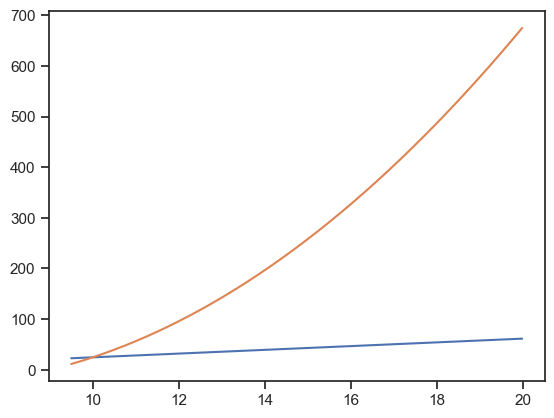

In [96]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

In [97]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
test.loc[[ind]]

PRICE   QUANTITY      PROFIT
1049  19.99  61.397694  674.760656

In [98]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit

In [99]:
optimal_price = {}
buying_price = 9

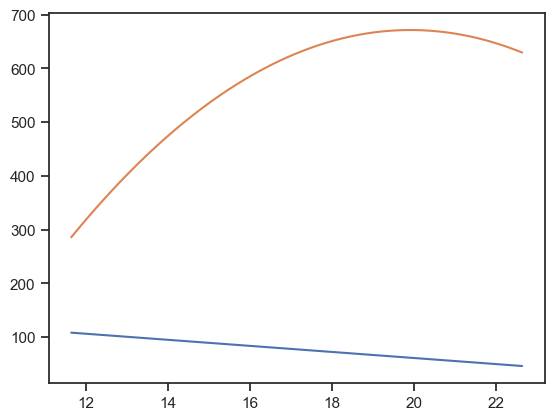

PRICE   QUANTITY      PROFIT
826   19.9  61.600383  671.444174

In [100]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)
optimal_price['burger_1070'] 

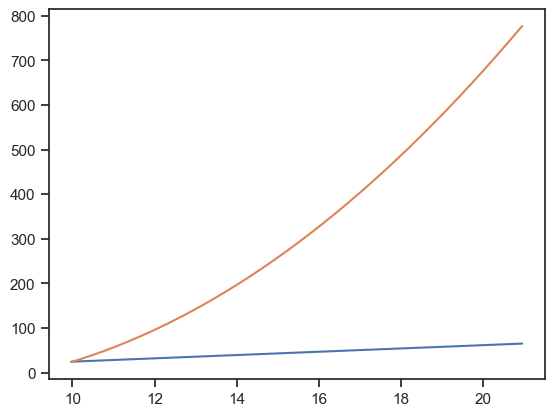

PRICE   QUANTITY      PROFIT
1099  20.96  64.978473  777.142534

In [101]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)
optimal_price['burger_2051'] 

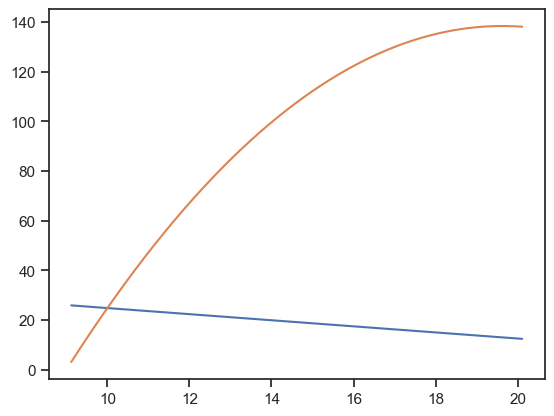

PRICE   QUANTITY      PROFIT
1050  19.62  13.035414  138.436092

In [102]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)
optimal_price['burger_2052']

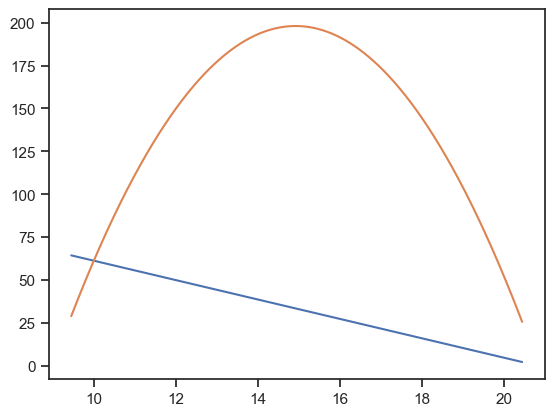

PRICE  QUANTITY      PROFIT
547  14.92  33.45253  198.038978

In [103]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)
optimal_price['burger_2053']

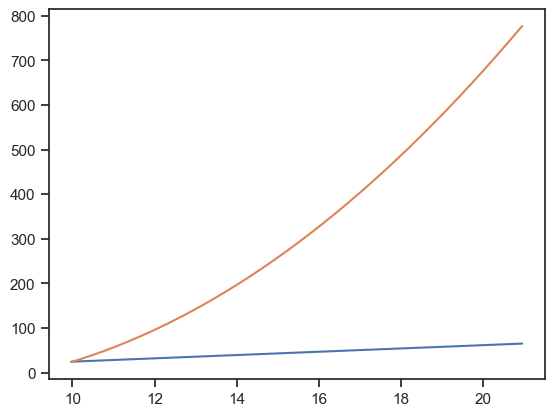

PRICE   QUANTITY      PROFIT
1099  20.96  64.978473  777.142534

In [104]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)
optimal_price['coke_2051']

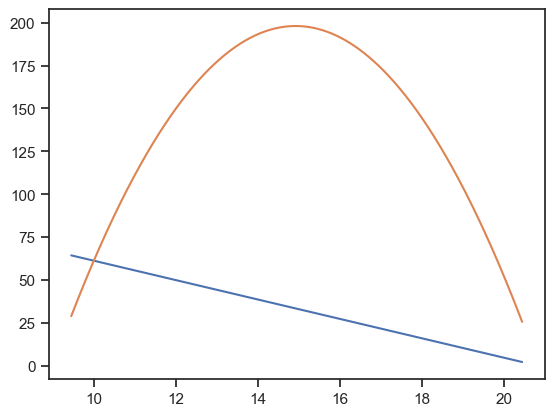

PRICE  QUANTITY      PROFIT
547  14.92  33.45253  198.038978

In [105]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)
optimal_price['coke_2053'] 

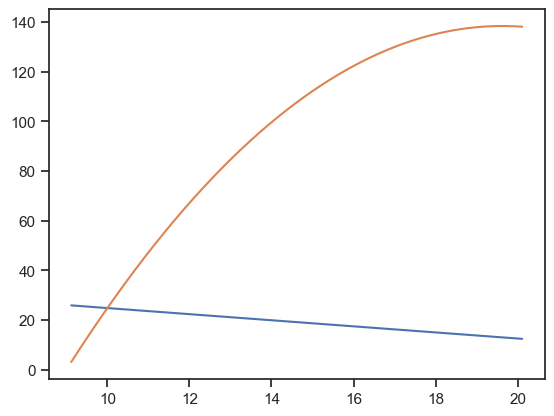

PRICE   QUANTITY      PROFIT
1050  19.62  13.035414  138.436092

In [106]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)
optimal_price['lemonade_2052'] 

In [107]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 826   19.9  61.600383  671.444174,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1099  20.96  64.978473  777.142534,
 'burger_2052':       PRICE   QUANTITY      PROFIT
 1050  19.62  13.035414  138.436092,
 'burger_2053':      PRICE  QUANTITY      PROFIT
 547  14.92  33.45253  198.038978,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1099  20.96  64.978473  777.142534,
 'coke_2053':      PRICE  QUANTITY      PROFIT
 547  14.92  33.45253  198.038978,
 'lemonade_2052':       PRICE   QUANTITY      PROFIT
 1050  19.62  13.035414  138.436092}